## Student Information
Name: 劉啓賢

Student ID: 110164519

GitHub ID: tsuchidaken

---

## Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__.

## Begin Assignment Here


## Part.1
* First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


In [1]:
# TEST necessary for when working with external scripts
# 使用autoreload來確保使用的模組是最新版本(重新載入最新模組)
%load_ext autoreload
%autoreload 2

### 1. The Data
* In this notebook we will explore the popular 20 newsgroup dataset, originally provided [here](http://qwone.com/~jason/20Newsgroups/).

### 2. Data Preparation

In [2]:
# categories 我們原題目四個分類
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# 從 Scikit Learn 抓取我們所需要的 dataset
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [3]:
# 資料集類別
type(twenty_train)
# 資料集概況
help(fetch_20newsgroups)

Help on function fetch_20newsgroups in module sklearn.datasets._twenty_newsgroups:

fetch_20newsgroups(*, data_home=None, subset='train', categories=None, shuffle=True, random_state=42, remove=(), download_if_missing=True, return_X_y=False)
    Load the filenames and data from the 20 newsgroups dataset (classification).
    
    Download it if necessary.
    
    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality               1
    Features                  text
    =================   ==========
    
    Read more in the :ref:`User Guide <20newsgroups_dataset>`.
    
    Parameters
    ----------
    data_home : str, default=None
        Specify a download and cache folder for the datasets. If None,
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.
    
    subset : {'train', 'test', 'all'}, default='train'
        Select the dataset to load: 'train' for the training set, 'test'
        fo

In [4]:
# 檢視資料集可用的內容
# 可用的屬性列印出來
attributes = [attr for attr in dir(twenty_train)]
for attr in attributes:
    print(attr, end=' / ')

DESCR / data / filenames / target / target_names / 

In [5]:
# 資料集 data屬性
print(twenty_train.data[0:2])
# 資料集 filename路徑屬性
print(twenty_train.filenames[0:2])
# 資料集 target_names屬性
print(twenty_train.target_names)
# 資料長度(應 data = filenames 數量)
print("data:",len(twenty_train.data),"filenames:",len(twenty_train.filenames))

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n', "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the proble

In [6]:
# 將 data 內容適當切割
# 以換行字串來切割例子
print(twenty_train.data[0].split("\n"))
# 包含子集的一個例子
print("\n".join(twenty_train.data[0].split("\n")))

['From: sd345@city.ac.uk (Michael Collier)', 'Subject: Converting images to HP LaserJet III?', 'Nntp-Posting-Host: hampton', 'Organization: The City University', 'Lines: 14', '', 'Does anyone know of a good way (standard PC application/PD utility) to', 'convert tif/img/tga files into LaserJet III format.  We would also like to', 'do the same, converting to HPGL (HP plotter) files.', '', 'Please email any response.', '', 'Is this the correct group?', '', 'Thanks in advance.  Michael.', '-- ', 'Michael Collier (Programmer)                 The Computer Unit,', 'Email: M.P.Collier@uk.ac.city                The City University,', 'Tel: 071 477-8000 x3769                      London,', 'Fax: 071 477-8565                            EC1V 0HB.', '']
From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tg

In [7]:
# 將目標類別切換
# 目標欄位為數值
print(twenty_train.target[0])
# 將數值轉換為關鍵字
print(twenty_train.target_names[twenty_train.target[0]])
print("-----")
# 前十個目標類別數值
print(twenty_train.target[0:10])
print("-----")
# 前十個目標類別數值轉換為關鍵字
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

1
comp.graphics
-----
[1 1 3 3 3 3 3 2 2 2]
-----
comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


#### ** >>> Exercise 1 (5 min): **  
* 在這個練習中，請列印出數據集中前三個樣本的 text 數據。 (參見上面的代碼以取得幫助)

In [8]:
for t in twenty_train.data[0:3]:
    print(t)
    print("---------------")

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

---------------
From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangula

### 3. Data Transformation


#### 3.1 Converting Dictionary into Pandas Dataframe


In [9]:
import pandas as pd
# my functions (自訂義工具)
import helpers.data_mining_helpers as dmh
# construct dataframe(Panda) from a list
'''
helpers.data_mining_helpers: 格式化文字欄位並移除特殊字符
def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs.data: # 處理DATA欄位得text
        temp_d = " ".join(d.split("\n")).strip('\n\t') #去除strip('').分割split('')
        D.append([temp_d])
    return D
'''
# Pandas 會將每個元素作為一行數據，自動為數據幀添加列標籤，並根據數據的類型推斷列的數據類型
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [10]:
print(len(X))
print(X[0:4])
print("---------------")
for t in X["text"][:3]:
    print(t)

2257
                                                text
0  From: sd345@city.ac.uk (Michael Collier) Subje...
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...
---------------
From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniru

#### Adding Columns


In [11]:
# 將類別添加到 dataframe
X['category'] = twenty_train.target

In [12]:
# 添加類別標籤
# X['category_name'] = X.category.apply(lambda t: twenty_train.target_names[t])
'''
def format_labels(target, docs):
    """ format the labels """
    return docs.target_names[target]
'''
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [13]:
X[0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


#### 3.2 Familiarizing yourself with the Data

In [14]:
# 我們想要查詢前10行（文件），
# 而且我們只想保留文本和 category_name 的屬性或字段。
X[:10][["text","category_name"]]
X[-10:][["text","category_name"]]
# using loc (by label) 註:欄位需要用文字
X.loc[:10,"text"]
# using iloc (by position)
X.iloc[:10, 0]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

#### ** >>> Exercise 2 (take home):**
* 使用pandas進行其他方法來查詢。

In [15]:
# 直接查詢前五筆資料
display(X.head())
print("-------")

# 僅篩選欄位"category_name"是"sci.med, comp.graphics"倆值的前五筆資料並使用isin()來篩選器
filter_category = ["sci.med","comp.graphics"]
filter_val = X["category_name"].isin(filter_category)
display(X.loc[filter_val,["text","category","category_name"]].head())
print("-------")

# 篩選關鍵字(ex:'Virgilio') 於全部資料
filter = X['text'].str.contains("Virgilio", na=False)
display(X.loc[filter_val , ["text","category_name"]])
print("-------")

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


-------


,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


-------


,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,comp.graphics
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,sci.med
...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,sci.med


-------


#### ** >>> Exercise 3 (5 min): **  
* 嘗試獲取屬於 "sci.med"類別的記錄，並查詢每10個記錄。只顯示前5個記錄。

In [16]:
X[X["category_name"]=="sci.med"].iloc[::10][0:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


### 4. Data Mining using Pandas

#### 4.1 Missing Values
* Eliminate Data Objects(消除數據對象:缺失值)

* Estimate Missing Values(估計獲取缺失值)

* Ignore the missing value during analysis(分析期間忽略缺失值)

* Replace with all possible values (用可能的值替換)


In [17]:
# 我們自己確認一下數據集確實沒有任何缺失值。我們可以輕鬆地使用Pandas提供的以下內置函數來做到這一點。
# isnull函數會檢視整個資料集中的空值，並在找到任何缺失的欄位或記錄時返回True。
# check missing values
X.isnull()

,text,category,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2252,False,False,False
2253,False,False,False
2254,False,False,False
2255,False,False,False


* 首先，使用isnull我們將我們的表格轉換成你在上面看到的True/False表格，在這種情況下，True表示數據缺失，而False表示數據存在。然後我們取出轉換後的表並對每一行應用一個函數，基本上是計算每筆記錄中是否有缺失值並列印出找到了多少缺失值。換句話說, check_missing_values 函數查看資料集中的每個欄位（屬性或列）並計算找到了多少缺失值。

In [18]:
'''
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)
'''
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


#### ** >>>Exercise 4 (5 min):**
* 我們來嘗試些不同的事情。與其按照行計算缺失值，不如嘗試在每列記錄中計算缺失值，而非每一列。
    *提示：`axis` 參數。查閱文檔以獲取更多信息。

In [19]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

In [20]:
# 做一些惡作劇並將一些虛擬數據插入到數據框中，並測試我們功能的可靠性
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
dummy_series

text        dummy_record
category               1
dtype: object

In [21]:
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose
# 因 X 矩陣格式，須將 dummy_series 一維陣列轉置
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
# check if the records was commited into result
len(result_with_series)

2258

In [22]:
# 現在我們已經添加了一些缺失值的記錄。讓我們嘗試我們的函數，看看它是否能檢測到結果數據框中存在缺失值。
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [23]:
# 可以直接將更改適用於X並將其分配給它本身,此修改會創建出需要稍後刪除此虛擬記錄的需求
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
print(len(X))
X.isnull().apply(lambda x: dmh.check_missing_values(x))

2258


,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [24]:
# 數據中有缺失值，我們希望刪除具有缺失值的記錄。
# 要刪除剛剛添加的含有缺失值的記錄，代碼如下：
X.dropna(inplace=True)
# 現在讓我們測試看看，我們是否已經去除了含有缺失值的記錄。
print(len(X))
X.isnull().apply(lambda x: dmh.check_missing_values(x))

2257


,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


####  ** >>>Exercise 5 (take home)**
* 有一句老話說，"魔鬼藏在細節之中。"當我們處理極大的數據時，逐一檢查記錄變得困難（就像我們到目前為止所做的那樣）。而且，我們甚至不知道面對的是哪種類型的缺失值。因此，“除錯”...以下過程中，描述你觀察到了什麼以及為何會發生。
* 提示： 為何 `.isnull()` 沒有效果？

In [25]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [26]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [27]:
# Answer here
# 我們從panda文件中發現，.isnull()函數，檢查物件是否為空值或缺失值。
# 若為空值或缺失值則返回True
# 例如:資料類型為缺失值(非字串)np.nan, none
print("index_0:",type(NA_df["missing_example"][0]))
print("index_4:",type(NA_df["missing_example"][4]))
# 例如:資料類型為空值(非字串)
print("index_1:",type(NA_df["missing_example"][1]))
print("*-----------")
# 然而我們從剩下選項中發現，其資料類型為字串
print("index_2:",type(NA_df["missing_example"][2]))
print("index_3:",type(NA_df["missing_example"][3]))
print("index_5:",type(NA_df["missing_example"][5]))
# 我們可以得知即使列印出來為空值或為缺失值，但當該資料類型為字串時
# 其.isnull()函數仍會返回false, 並不會判斷為缺失值

index_0: <class 'float'>
index_4: <class 'NoneType'>
index_1: <class 'float'>
*-----------
index_2: <class 'str'>
index_3: <class 'str'>
index_5: <class 'str'>


#### 4.2 Dealing with Duplicate Data



In [28]:
#  首先，讓我們檢查目前的資料集中有多少重複的數據。
# 以下是用來檢查重複數據的程式碼行。
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

In [29]:
# 我們也可以通過簡單的操作來檢查重複記錄的總和：
#duplicated()操作做的就是逐條記錄檢查而不是逐列檢查。
sum(X.duplicated())

0

In [30]:
# 如果我們想要像上面那樣對某些特定列進行重複性檢查，而不是所有列
# 現在，讓我們創建一些重複的虛擬記錄並將其附加到主數據框`X`。
# 隨後，讓我們嘗試消除重複項。
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1,
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1,
                             'category_name': "dummy category"
                        }]
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)
print(len(X))
print(sum(X.duplicated()))

2259
1


In [31]:
# 我們已將虛擬重複項添加到X中。
# 現在，我們面臨的決定是在找到重複記錄後該如何處理。
# 在我們的情況下，我們希望去除所有重複的記錄，而不保留。
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
len(X)

2257

### 5. Data Preprocessing
* the items we will cover in the preprocessing section of this notebook are as follows:
    - Aggregation
    - Sampling
    - Dimensionality Reduction
    - Feature Subset Selection
    - Feature Creation
    - Discretization and Binarization
    - Attribute Transformation

#### 5.1 Sampling
* 讓我們來了解如何使用pandas操作進行取樣。

In [32]:
print(X.shape, type(X) ,sep="\n")
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(2257, 3)
<class 'pandas.core.frame.DataFrame'>


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


In [33]:
print(len(X_sample))
display(X_sample[0:4])

1000


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian


#### ** >>>Exercise 6 (take home):**
* 從`X`資料框轉變到`X_sample`資料框，有注意到任何改變嗎？它們是什麼？請報告你所注意到的每一項與`X`先前狀態相比的改變。隨時查詢並更仔細地觀察這些在資料框中的變化。

(1000, 3)


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian


,text,category,category_name
367,From: echen@burn.ee.washington.edu (Ed Chen) S...,1,comp.graphics
2108,From: bobbe@vice.ICO.TEK.COM (Robert Beauchain...,0,alt.atheism
2170,From: naren@tekig1.PEN.TEK.COM (Naren Bala) Su...,0,alt.atheism
1776,From: whheydt@pbhya.pacbell.com (Wilson Heydt)...,3,soc.religion.christian


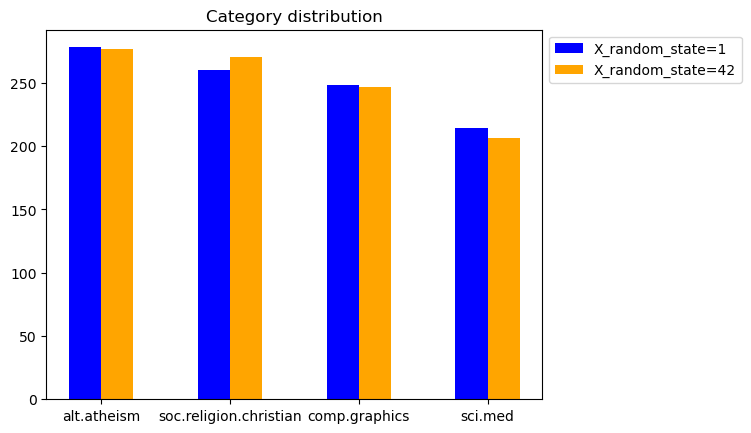

In [34]:
# 首先我們對X資料從2257採樣至1000。維度上，樣本數下降，但欄位數不變
print(X_sample.shape)
# 當中我們設定不同的 random_state 其採樣的樣本及順序也不同，例如:
X_sample_42 = X.sample(n=1000,random_state=42)
display(X_sample_42[0:4])
X_sample_1 = X.sample(n=1000,random_state=1)
display(X_sample_1[0:4])
# 可以發現與之前 random_state=42 的時候不同。
# 承上，雖然取樣的 random_state 的亂數參數不同導致取樣不同,但統計後從圖上可以觀察到，
# 其各個類別的採樣數量及分布是差不多的。
import matplotlib.pyplot as plt
%matplotlib inline

X_counts = X.sample(n=1000,random_state=1).category_name.value_counts()
X_sample_counts = X.sample(n=1000,random_state=42).category_name.value_counts()
X_categories = np.arange(len(categories))

width = 0.25
plt.bar(X_categories, X_counts, width, color='blue', label='X_random_state=1')
plt.bar(X_categories + width, X_sample_counts, width, color='orange', label='X_random_state=42')
plt.xticks(X_categories + width /2, categories)
plt.title('Category distribution')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

* 從樣本和原始數據集中類別的分佈，我們來視覺化並分析兩組數據集之間的差異。為了產生一些視覺化效果，我們將使用`matplotlib`這個python library。

In [35]:
# 讓我們來看看樣本和原始數據集中類別的分佈
import matplotlib.pyplot as plt
%matplotlib inline
# 用之前所使用的分類類別
print(categories)

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']


In [36]:
print(X.category_name.value_counts())

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


<Axes: title={'center': 'Category distribution'}>

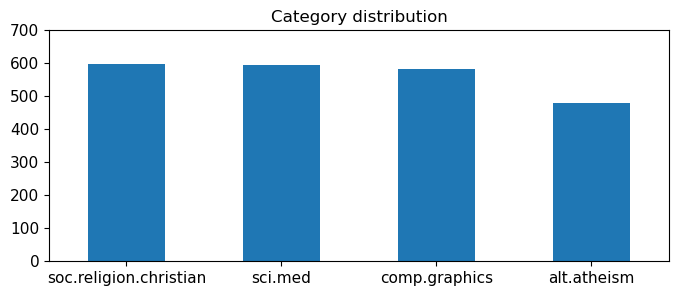

In [37]:
# 原樣本: plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],
                                    rot = 0, fontsize = 11, figsize = (8,3))

sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: category_name, dtype: int64


<Axes: title={'center': 'Category distribution'}>

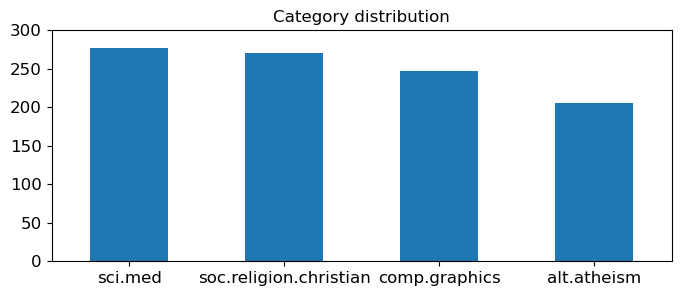

In [38]:
print(X_sample.category_name.value_counts())

# 抽樣樣本: plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300],
                                           rot = 0, fontsize = 12, figsize = (8,3))

您可以使用以下命令來查看其他可用的風格，以美化您的圖表。
```python
print(plt.style.available)```

#### ** >>>Exercise 7 (5 min):**
* 請注意，對於`ylim`參數，我們硬編碼了y的最大值。是否有可能自動化這個過程，而不是硬編碼呢？你會如何去做呢？（提示：查看上面的代碼以獲得線索）

277
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: category_name, dtype: int64


<Axes: title={'center': 'Category distribution'}>

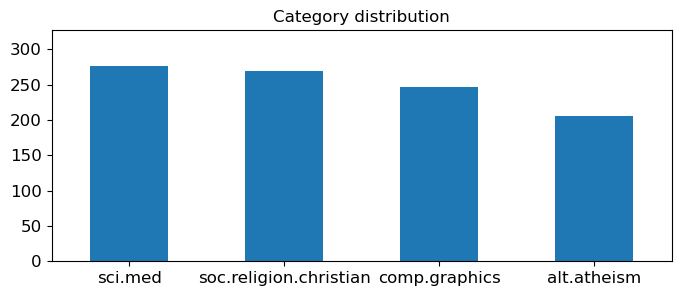

In [39]:
# Answer here
# plot barchart for X_sample
print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound],
                                           rot = 0, fontsize = 12, figsize = (8,3))

#### ** >>>Exercise 8 (take home):**
* 我們也可以做兩組數據集之間分佈的並列比較，但或許你可以試著將其當作一項練習。以下我們展示了我們正在尋找的圖表類型的快照。

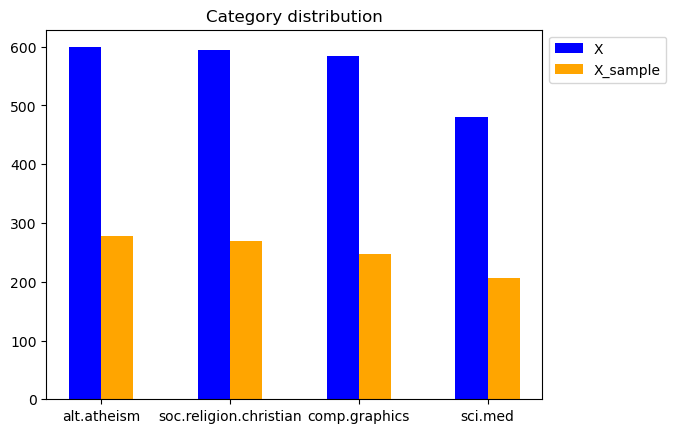

In [40]:
X_counts = X.category_name.value_counts()
X_sample_counts = X_sample.category_name.value_counts()
X_categories = np.arange(len(categories))
width = 0.25
plt.bar(X_categories, X_counts, width, color='blue', label='X')
plt.bar(X_categories + width, X_sample_counts, width, color='orange', label='X_sample')
plt.xticks(X_categories + width /2, categories)
plt.title('Category distribution')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

* 從兩組數據集中突出的一點是，類別的分佈相對保持不變，這對我們數據科學家來說是好消息。有許多方法可以在數據集上進行抽樣並仍獲得足夠代表性的數據集。

#### 5.2 Feature Creation
* 特徵創建就是我們希望從原始數據集中創建新的有趣且有用的特徵；
* 為了參與到每段文字，我們可以開始考慮獲得一些關於文章的統計資料：像是**單詞分佈**或者**單詞頻率**之類。
* 在進一步編碼之前，我們也將介紹一個實用的文本挖掘庫，稱為[NLTK](http://www.nltk.org/)。NLTK庫是一種用於文本挖掘任務的自然語言處理工具，所以我們最好從現在開始熟悉它（它可能對最終項目有所幫助！）。特別地，我們打算使用NLTK庫來進行分詞，因為我們對把句子分解成其各個組件感興趣，這些組件包括單詞、表情符號、電郵等。那麼讓我們開始吧！ 我們可以如下呼叫`nltk`庫：
```python
import nltk
```

In [41]:
import nltk
nltk.download('punkt')
'''
LookupError:
**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
'''

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tsuchida\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


"\nLookupError:\n**********************************************************************\n  Resource punkt not found.\n  Please use the NLTK Downloader to obtain the resource:\n\n  >>> import nltk\n  >>> nltk.download('punkt')\n"

In [42]:
# takes a like a minute or two to process
# tokenize_text 分詞器: 會把一文章所有單字或符號進行分割
'''
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

'''
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [43]:
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

* 如果你現在仔細看一下`X`表格，你會看到新增的`unigrams`欄位。你會注意到它包含了從原始的`text`欄位中提取出來的一系列標記。乍看之下，你可能會覺得分詞器並沒有做得很好，讓我們更深入地觀察單一紀錄，並查看使用 `nltk` 進行分詞的確切結果是什麼。

In [44]:
X[0:4]

,text,category,category_name,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."


In [45]:
list(X[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

#### 5.3 Feature subset selection
* 我們將遠離主數據集（做特徵子集選擇），並且我們將從原始數據集生成文檔-詞彙矩陣。換句話說，我們將創建類似於此的東西。

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

* 最初，它的形狀並不會與上面的表格相同，但我們稍後會討論這個問題。現在，讓我們使用 scikit learn 內建的功能來生成這份文件。你將親自體驗到，無需太多編程就能輕易生成這張表格。

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
# print(X.text)
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(type(X_counts)) # document-term matrix
print(X_counts.shape) # 共有35788 字、符號
print(X_counts[0])

<class 'scipy.sparse._csr.csr_matrix'>
(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [47]:
print(count_vect.get_feature_names_out()[14887])
print(count_vect.get_feature_names_out()[29022])
print(count_vect.get_feature_names_out()[8696])

from
sd345
city


In [48]:
X.text[0]

'From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. '

In [49]:
# 建立分析器
# count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
analyze(X.text[0])
# stop words (無意義符號而且重複的字串)

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

* 我們用那兩行程式碼做的是將文章轉換成詞彙-文件矩陣。這些程式碼使用內建的、預設的分詞器（通常被稱為分析器）來對每篇文章進行分詞，然後產生每份文件的單字頻率向量。
* 我們可以創建自己的分析器，甚至使用我們之前構建的nltk分析器。為了保持整潔和最小化，我們將使用CountVectorizer提供的預設分析器。讓我們仔細看看這個分析器。

In [50]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")
# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

#### ** >>> Exercise 9 (5 min):**
* 讓我們用剛剛建立的新分析器來分析我們X數據框的第一筆記錄。去試試看吧！

In [51]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [52]:
# print((list(X[:1].text))) # 每個字皆用空白作為分斷
analyze(" ".join(list(X[:1].text)))

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [53]:
# 現在讓我們來看看我們上面建立的詞彙-文件矩陣。
# We can check the shape of this matrix by:
print(X_counts.shape)

(2257, 35788)


In [54]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:20]

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007', '000usd', '0010',
       '001004', '0010580b', '001125', '001200201pixel', '0014', '001642',
       '00196', '002'], dtype=object)

![alt txt](https://i.imgur.com/57gA1sd.png)

* 在上面，我們可以看到在所有文件`X`中找到的特征，基本上是在所有文件中找到的所有術語。正如我之前所說，這種轉換並不是我們在上面看到的漂亮格式（表格）--詞彙文檔矩陣。我們可以用`count_vect`向量化器和它的轉換`X_counts`做很多事情。您可以在[CountVectorizer](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)找到更多關於其他酷炫功能的信息。
* 現在，讓我們嘗試獲得一些東西，這些東西與我上面提供的漂亮表格非常接近。在深入到實現此目標的代碼之前，有必要提及選擇`CountVectorizer` 的 `fit_transform`的原因是它能有效地學習詞彙字典並返回一個術語文檔矩陣。
* 在接下来的代码中，我们想要提取前五篇文章，并将它们转化为文档-词项矩阵，或者在这种情况下是一个二维数组。开始吧。

In [55]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [56]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

* 如你所見，結果僅是這個龐大的稀疏矩陣，其生成過程計算密集且難以視覺化。但我們可以看到第五條記錄，在開頭特別包含一個`1`，從我們的特徵名稱中，我們可以推斷出這篇文章確實包含了一個`00`詞彙。

#### ** >>>Exercise 10 (take home):**
* 我們說過，第五筆記錄開頭的`1`代表了`00`這個詞彙。注意同一筆記錄中還有另一個1。你能提供可以驗證這個1代表詞彙表中什麼字的程式碼嗎？請盡可能地做到效率最高。

In [57]:
# count_vect.get_feature_names_out()[0:1]
# 建立物件
matrix = X_counts[0:5, 0:100].toarray()
# 透過 numpy.where 查詢第五筆陣列記錄內所有 1 的索引
print(np.where(matrix[4]==1))
# 原來開頭位置0之外，還有另一個在第37索引值，便能查出另一個該值的代表詞彙("01")了
count_vect.get_feature_names_out()[37]

(array([ 0, 37], dtype=int64),)


'01'

* 為了讓您開始思考如何更好地分析您的數據或轉換，讓我們來看看我們詞彙-文件矩陣的這張漂亮的小熱點圖。當你從一個不同的角度開始觀察數據時，可能會驚訝地發現你可以挖掘到的寶藏。視覺化就是出於這個原因而有用。

In [58]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
print(plot_y)

['term_00', 'term_000', 'term_0000', 'term_0000001200', 'term_000005102000', 'term_0001', 'term_000100255pixel', 'term_00014', 'term_000406', 'term_0007', 'term_000usd', 'term_0010', 'term_001004', 'term_0010580b', 'term_001125', 'term_001200201pixel', 'term_0014', 'term_001642', 'term_00196', 'term_002']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']


In [59]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


* 對於熱點圖，我們將使用另一個名為`seaborn`的視覺化庫。它是建立在matplotlib之上，並與pandas數據結構密切集成。 seaborn的最大優勢之一是其預設美學比matplotlib更具視覺吸引力。請見下面的比較。

,term_00,term_000,term_0000,term_0000001200,term_000005102000,term_0001,term_000100255pixel,term_00014,term_000406,term_0007,term_000usd,term_0010,term_001004,term_0010580b,term_001125,term_001200201pixel,term_0014,term_001642,term_00196,term_002
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


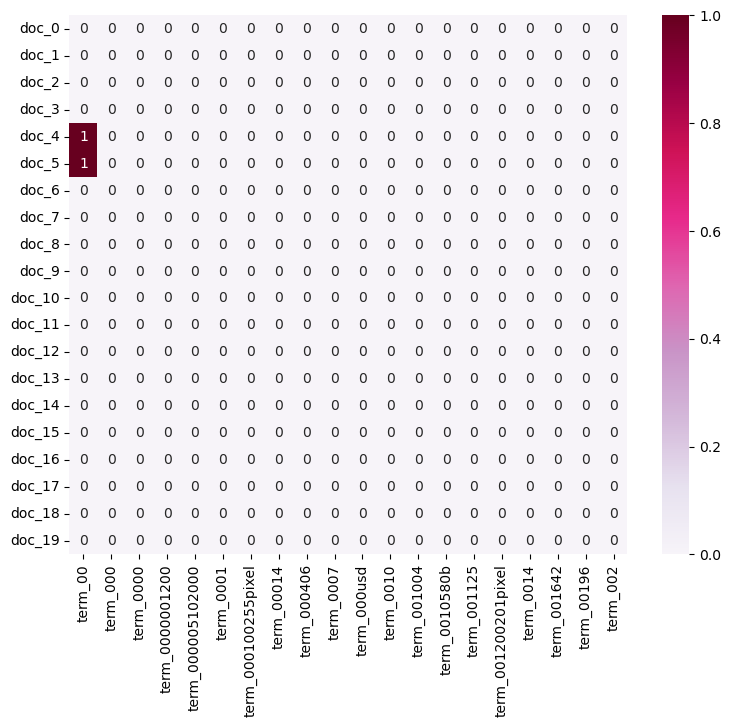

In [60]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### ** >>>Exercise 11 (take home):**
* 從上面的圖表中，我們可以看到詞彙-文件矩陣有多麼稀疏；也就是說，在矩陣的子選擇中只有一個詞彙的頻率為`1`。順便提一下，你可能已經注意到我們只選擇了20篇文章和20個詞彙來畫直方圖。作為一項運動，你可以嘗試修改上面的代碼以畫出整個詞彙-文件矩陣或僅其樣本。你會如何有效地做到這一點呢？請記住，字典裡有很多單詞。在下面報告您將使用哪些方法來得到一個好且有用的視覺化

(20, 20)
['and' 'as' 'be' 'for' 'have' 'in' 'is' 'it' 'me' 'my' 'not' 'of' 'on'
 'that' 'the' 'this' 'to' 'will' 'with' 'you']
['term_and', 'term_as', 'term_be', 'term_for', 'term_have', 'term_in', 'term_is', 'term_it', 'term_me', 'term_my', 'term_not', 'term_of', 'term_on', 'term_that', 'term_the', 'term_this', 'term_to', 'term_will', 'term_with', 'term_you']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']
[[ 0  0  0  0  0  1  1  0  0  0  0  1  0  0  5  1  4  0  0  0]
 [ 0  1  4  2  2  2 10  2  1  1  0  8  0  0 11  3  4  0  0  0]
 [ 9  0  8  6  1  6  4  8  6  4  8 10  1  8 14 14 26  4  7 13]
 [ 1  0  0  1  0  3  1  0  3  0  0  2  2  0  6  1  0  0  0  0]
 [ 3  2  0  2  0  3  2  1  0  0  0  3  1  1 10  2  8  0  0  1]
 [ 7  3 12  0  2  4  7  1  1  1  4  6  1 10 12  2 14  0  0  0]
 [ 7  4  3  5  1  4  4  3  0  0  4  7  3  2  3  0  8  0  2  0]
 [ 9 

,term_and,term_as,term_be,term_for,term_have,term_in,term_is,term_it,term_me,term_my,term_not,term_of,term_on,term_that,term_the,term_this,term_to,term_will,term_with,term_you
doc_0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,5,1,4,0,0,0
doc_1,0,1,4,2,2,2,10,2,1,1,0,8,0,0,11,3,4,0,0,0
doc_2,9,0,8,6,1,6,4,8,6,4,8,10,1,8,14,14,26,4,7,13
doc_3,1,0,0,1,0,3,1,0,3,0,0,2,2,0,6,1,0,0,0,0
doc_4,3,2,0,2,0,3,2,1,0,0,0,3,1,1,10,2,8,0,0,1
doc_5,7,3,12,0,2,4,7,1,1,1,4,6,1,10,12,2,14,0,0,0
doc_6,7,4,3,5,1,4,4,3,0,0,4,7,3,2,3,0,8,0,2,0
doc_7,9,4,5,1,4,3,9,10,1,4,4,11,8,11,21,2,11,5,5,0
doc_8,5,0,0,0,0,3,5,2,0,0,0,4,0,2,6,1,6,0,0,1
doc_9,23,3,1,3,7,4,1,2,12,9,5,6,6,18,10,7,21,0,9,5


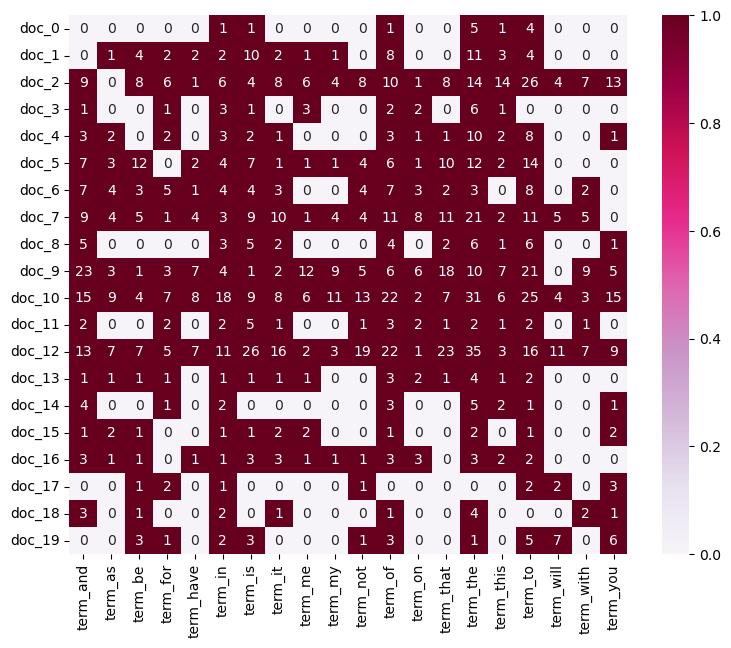

In [61]:
# 目的: 找出最頻繁出現的20個詞彙來得到比較好且有用的資訊
# 首先我們利用CountVectorizer的參數max_features 來設定我們找出最頻繁出現的20個詞彙
coun_vect_pra = CountVectorizer(max_features=20)
# 帶入20篇文章成立矩陣
count_matrix_pra = coun_vect_pra.fit_transform(X.text[0:20])
# 我們可以發現矩陣維度為(20,20)
print(count_matrix_pra.shape)
# 列出最頻繁出現的20個詞彙
print(coun_vect_pra.get_feature_names_out()[0:20])
# count_matrix_pra[0:20, 0:20].toarray()
# X軸為前20個詞彙項目
plot_x = ["term_"+str(i) for i in coun_vect_pra.get_feature_names_out()[0:20]]
print(plot_x)
# 獲得 document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
print(plot_y)
# 建立前20篇文章和最常出現的20個詞彙矩陣
plot_z = count_matrix_pra[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)
# 使用seaborn來建立heatmap
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### 5.4 Dimensionality Reduction
* 由於我們剛剛接觸到稀疏性的概念，最自然地，“維數災難”的問題就出現了。我不打算深入全面解釋降維是什麼以及它是什麼……更有效地處理結果。
* 我們將利用PCA來有效地降低我們數據的維度，主要目標是"找到一種向量投影，能捕捉到數據中最大量的變異性。

[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**Input:** Raw term-vector matrix

**Output:** Projections

In [62]:
from sklearn.decomposition import PCA

In [63]:
print(X_counts.shape)
# 透過PCA降低維度為2
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2257, 35788)
(2257, 2)


In [64]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [65]:
X_reduced

array([[-17.01172954,   0.45016637],
       [ -6.80574586,  -1.15880603],
       [ 15.79461065,   3.62233092],
       ...,
       [ 19.97508176,  -2.85495802],
       [163.88523745,  29.52467675],
       [-16.58569528,   0.61748552]])

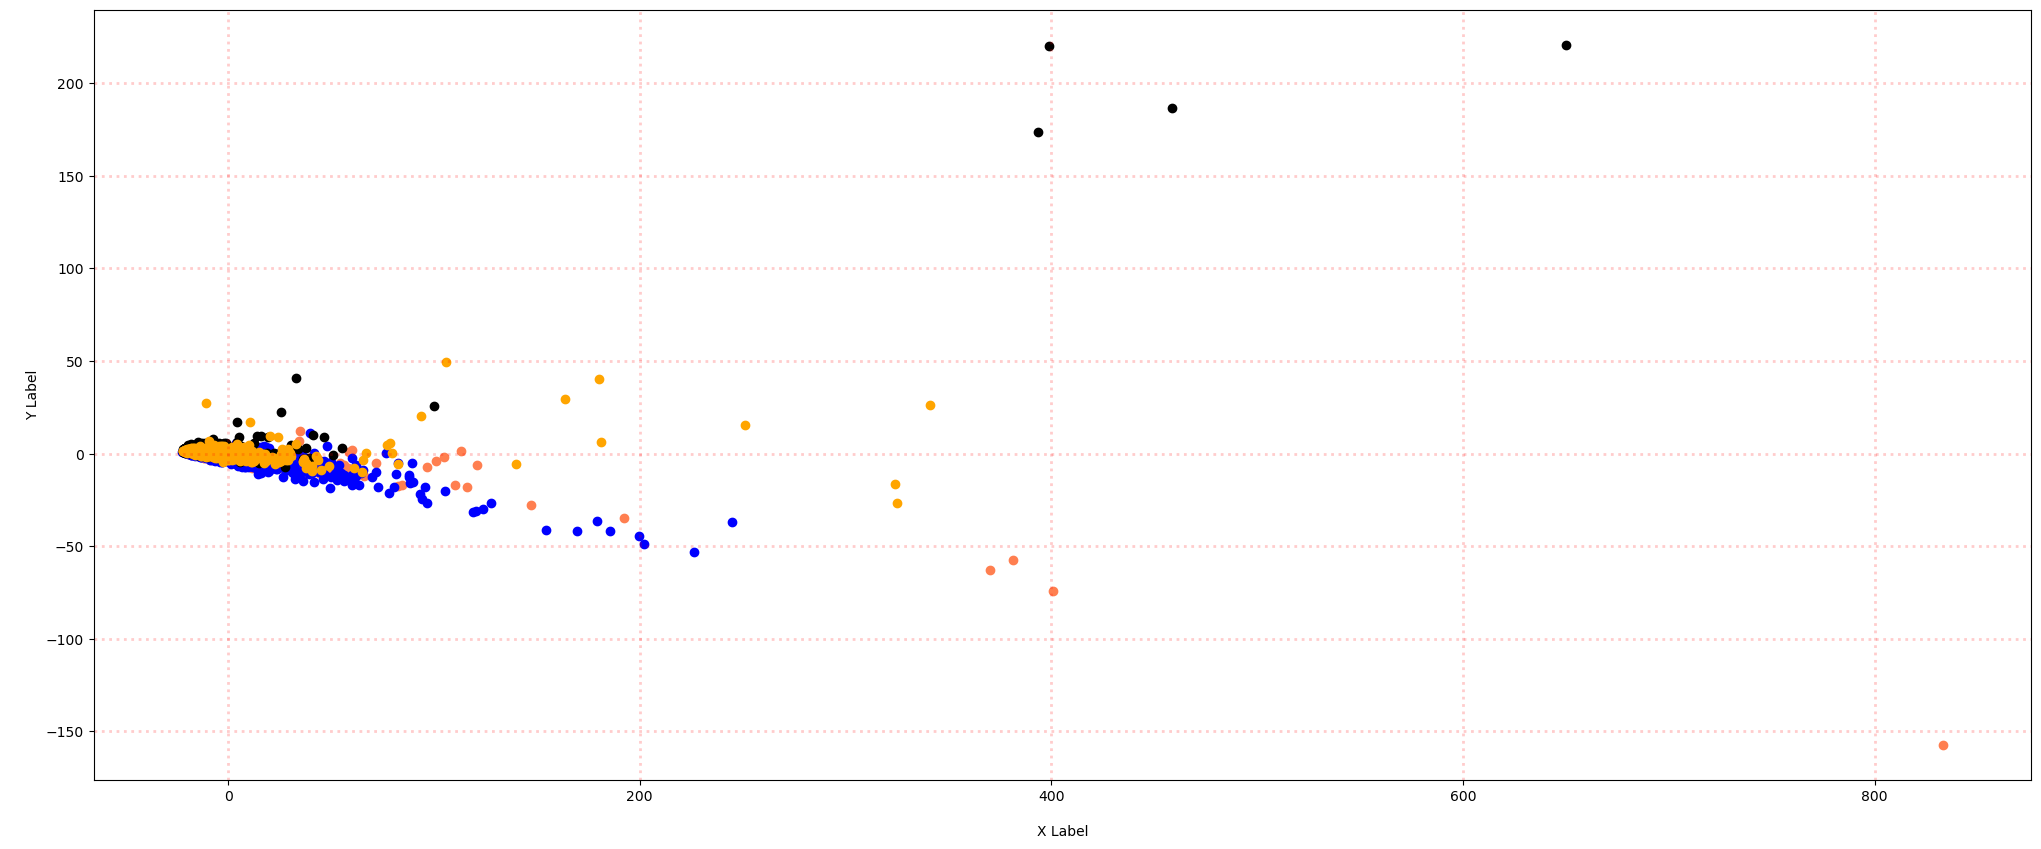

In [66]:
# plots四種顏色
col = ['coral', 'blue', 'black', 'orange']
'''
# 每個文件兩個維度
AB
CD
EF
#轉至矩陣
ACE # X軸
BDF # Y軸
'''
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='red', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
plt.show()

* 從上述的2D視覺化中，我們可以看到數據中有輕微的"分離跡象"；也就是說，它們可能按類別有一些特殊的分組，但這並不清楚。PCA被應用於原始頻率，這被認為是非常天真的方法，因為有些詞並不真正屬於某一文件。只按詞彙頻率劃分類別被認為是"詞袋"方法。在後續的課程中你將學到如何從術語向量矩陣創建更好特性的不同方法，例如（TF-IDF）。

#### ** >>>Exercise 12 (take home):
* 請嘗試將維度降至3，並使用3-D圖形來繪製結果。請至少從三個不同的角度（攝像機位置）來檢查您的結果，並描述您發現了什麼。

$提示$：你可以參考文檔中的Axes3D。

In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_pca = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_pca.shape)

(2257, 3)


view plane: YZ


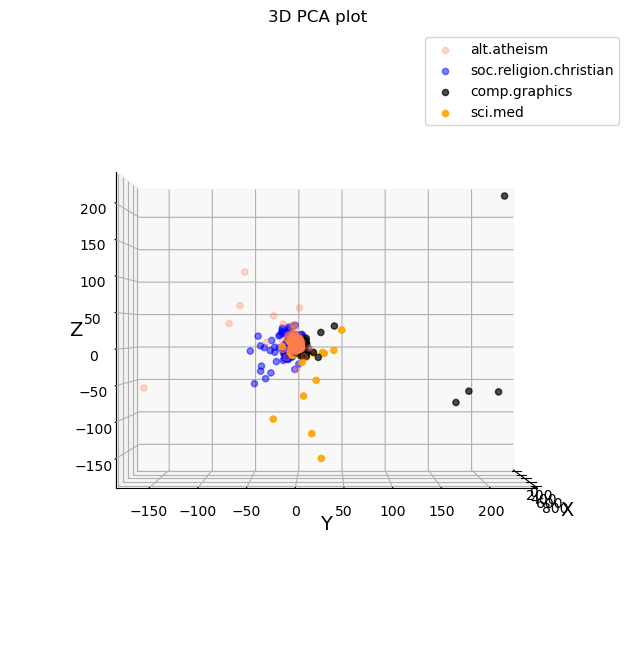

view plane: XY


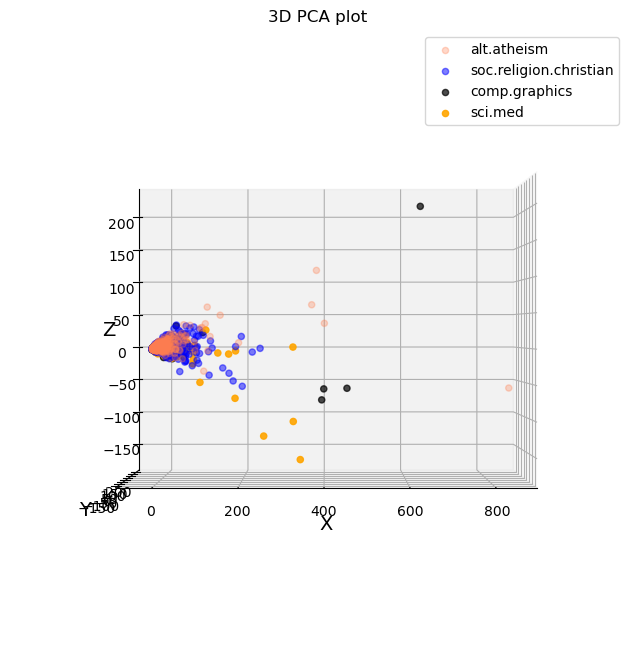

view plane: YZ:45


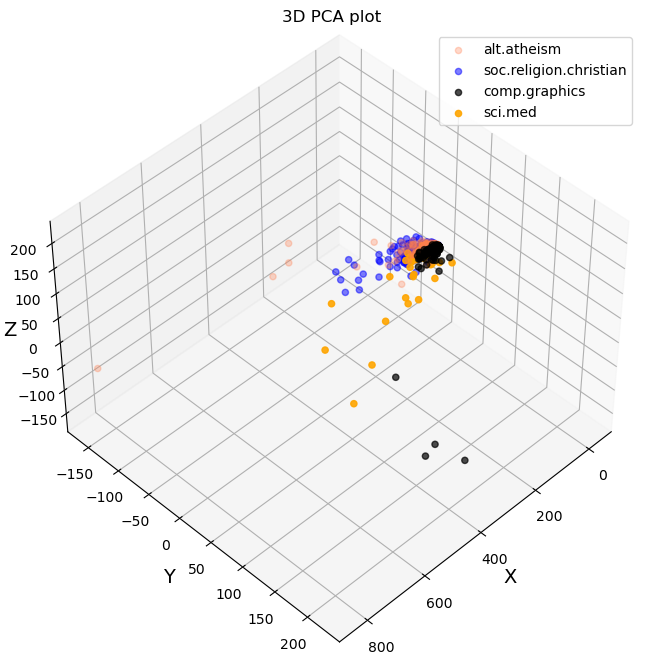

view plane: default


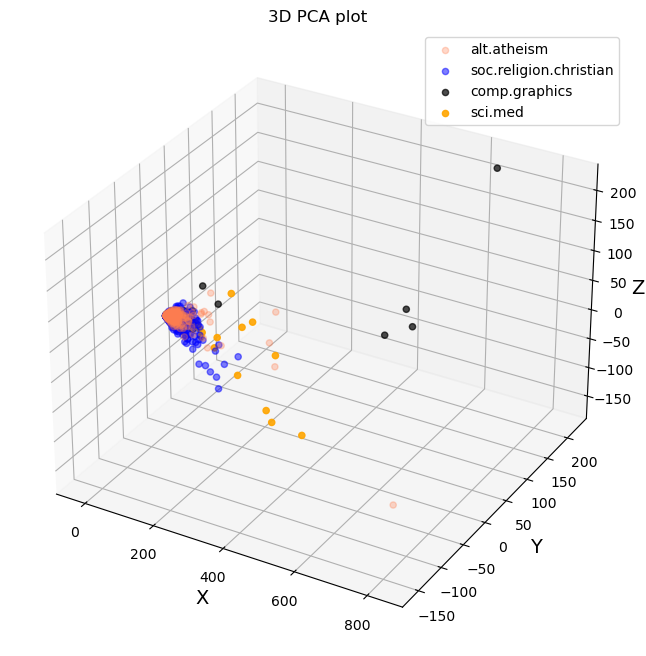

In [68]:
# 設定函數PCA_3D來繪圖，參數可設各種角度
def PCA_3D(elev=None, azim=None):
    # 影像大小及其他設定
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(1,1,1, projection='3d')
    fig.patch.set_facecolor('white')
    # 顏色
    col = ['coral', 'blue', 'black', 'orange']
    categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
    alpha=[0.3,0.5,0.7,0.9]

    for c, category, a in zip(col, categories, alpha):
        xs = X_pca[X['category_name'] == category].T[0]
        ys = X_pca[X['category_name'] == category].T[1]
        zs = X_pca[X['category_name'] == category].T[2]

        ax.scatter(xs, ys, zs,c = c,label=category ,marker='o',alpha=a)

    # 設定標籤
    ax.set_xlabel("X", fontsize=14)
    ax.set_ylabel("Y", fontsize=14)
    ax.set_zlabel("Z", fontsize=14)
    ax.zaxis.labelpad = -0.7
    ax.legend()
    plt.title("3D PCA plot")
    # 設定比例縮放
    ax.set_box_aspect(aspect=None, zoom=1)
    ax.view_init(elev=elev,azim=azim)
    plt.show()

print("view plane: YZ")
PCA_3D(elev=0, azim=0)
print("view plane: XY")
PCA_3D(elev=0, azim=-90)
print("view plane: YZ:45")
PCA_3D(elev=45, azim=45)
print("view plane: default")
PCA_3D()

* 從四個張圖片、四個不同的角度中可以發現，雖將原資料降維成三個維度，其類型分佈呈現非常集中，代表組成越相似,重複多。然而comp.graphics、alt.atheism等類型仍有一到四個不等的極端值，表示組成差異大，建議在訓練時可以去除不正常的離群值

#### 5.5 Attribute Transformation / Aggregation
* 除了應用降維技術來處理稀疏性問題，我們還可以對詞向量矩陣進行其他操作。在此，我們將生成一個包含所有文章中找到單詞的簡單分佈。直覺上，關於屬性轉換的話題上, 我們將取得詞彙分布並把分布放入一種易於分析詞彙分布模式的比例中。！
* 首先，我們需要計算所有文件中每個詞彙的頻率。視覺上來說，我們尋求以垂直方向添加2D矩陣的值；也就是說，每一列的總和。您也可以將此過程稱為聚合。
* ![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vTMfs0zWsbeAl-wrpvyCcZqeEUf7ggoGkDubrxX5XtwC5iysHFukD6c-dtyybuHnYigiRWRlRk2S7gp/pub?w=750&h=412)

In [69]:
# 請注意，這需要時間來計算。您可能希望減少您想要計算頻率的項目數量。
#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]
# 此欄可直接跳過改用np來計算總合
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))


35788


In [70]:
#使用np工具來達成計算，因原來是二維的矩陣，我們只求第一個為陣列
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term: 00

134

In [71]:
term_frequencies

array([134,  92,   1, ...,   1,   1,   1], dtype=int64)

In [72]:
count_vect.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzz', 'ªl', 'íålittin'], dtype=object)

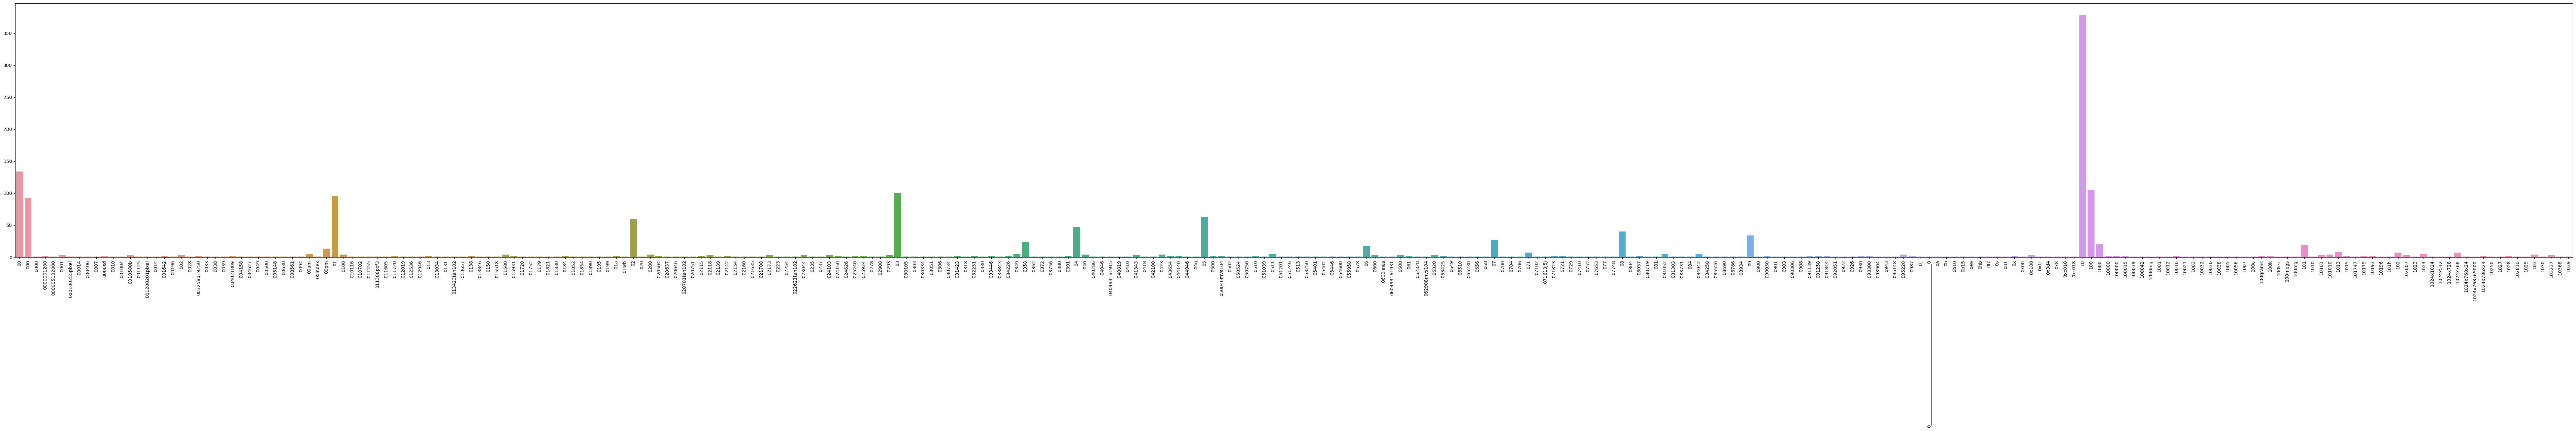

In [73]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

#### >>> **Exercise 13 (take home):**
* 如果你想要更漂亮的互動式可視化，我建議你嘗試安裝並使用plotly來實現這一目標。

In [74]:
!pip install chart-studio

Defaulting to user installation because normal site-packages is not writeable


In [75]:
import pandas as pd
import plotly.graph_objs as go
# 建立ㄌX&Y軸
x = count_vect.get_feature_names_out()[:300]
y = term_frequencies[:300]
trace = go.Bar(x=x,y=y,name="詞彙出現次數")
# 建立標籤
layout = go.Layout(title="詞彙出現頻率分析",xaxis={"title":"詞彙特徵"},
    yaxis={"title":"次數"},barmode="group")
fig = go.Figure(data = [trace],layout=layout)
fig.show()

#### >>> **Exercise 14 (take home):**
* 上述圖表只包含文件中的300個詞彙，並且已經對計算和視覺化產生了大量的計算壓力。作為一項練習，你能否有效地減少你想要視覺化的術語數量。


In [76]:
# 目的: 僅選出頻率大於1的詞彙來更有效的視覺化數量
# 首先將300個詞彙與相對出現次數結合成(300,2)的維度
x = np.asarray(count_vect.get_feature_names_out()[:300]).reshape((300,1))
y = term_frequencies[:300].reshape((300,1))
sum =  np.hstack((x, y))
# 僅選出出現次數大於1的詞彙
feature_names=[]
frequencies=[]
for j in range(0,sum.shape[0]):
    if sum[j,1]>1:
        feature_names.append(sum[j,0])
        frequencies.append(sum[j,1])
# 將選出的詞彙和出現次數視覺化
x = feature_names
y = frequencies
trace = go.Bar(x=x,y=y,name="詞彙出現次數")
layout = go.Layout(title="僅選出詞彙頻率大於1",xaxis={"title":"詞彙特徵"},
    yaxis={"title":"頻率"},barmode="group")

fig = go.Figure(data = [trace],layout=layout)
fig.show()

#### >>> **Exercise 15 (take home):**
此外，您可以嘗試按照頻率而非字母順序來對`x軸`上的條件進行排序。這樣，視覺化會更有意義，您將能夠觀察到所謂的[long tail](https://en.wikipedia.org/wiki/Long_tail)（由於它在數據挖掘和其他統計課程中會出現很多次，因此需要熟悉這個術語）。見下圖
![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [77]:
# 將詞彙出現頻率分析:從大到小排列且詞彙頻率大於1
# 首先將300個詞彙與相對出現次數結合成(300,2)的維度
x = np.asarray(count_vect.get_feature_names_out()[:300]).reshape((300,1))
y = term_frequencies[:300].reshape((300,1))
sum =  np.hstack((x, y))
# 將出現次數的詞彙由大到小排列
sum_sorted = np.array(sorted(sum, key=lambda row: row[1], reverse=True))
# 且僅選出出現次數大於1的詞彙
feature_names=[]
frequencies=[]
for j in range(0,sum_sorted.shape[0]):
    if sum_sorted[j,1]>1:
        feature_names.append(sum_sorted[j,0])
        frequencies.append(sum_sorted[j,1])
# 將重新排列的詞彙和出現次數視覺化
x = feature_names
y = frequencies
trace = go.Bar(x=x,y=y,name="詞彙出現次數")
layout = go.Layout(title="從大到小排列且詞彙頻率大於1",xaxis={"title":"詞彙特徵"},
    yaxis={"title":"頻率"},barmode="group")

fig = go.Figure(data = [trace],layout=layout)
fig.show()

* 既然我們已經有了這些詞頻，我們也可以將向量中的值轉換成對數分佈。我們需要做的就是引入由python提供的`math`庫並應用於詞頻向量的值陣列。這是一個典型的屬性轉換示例。讓我們來嘗試看看。對數分佈是一種技術，可以將詞頻視覺化到一種使您能夠輕鬆地以更易讀格式查看分佈的比例上。

In [78]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '0000'),
 Text(3, 0, '0000001200'),
 Text(4, 0, '000005102000'),
 Text(5, 0, '0001'),
 Text(6, 0, '000100255pixel'),
 Text(7, 0, '00014'),
 Text(8, 0, '000406'),
 Text(9, 0, '0007'),
 Text(10, 0, '000usd'),
 Text(11, 0, '0010'),
 Text(12, 0, '001004'),
 Text(13, 0, '0010580b'),
 Text(14, 0, '001125'),
 Text(15, 0, '001200201pixel'),
 Text(16, 0, '0014'),
 Text(17, 0, '001642'),
 Text(18, 0, '00196'),
 Text(19, 0, '002'),
 Text(20, 0, '0028'),
 Text(21, 0, '003258u19250'),
 Text(22, 0, '0033'),
 Text(23, 0, '0038'),
 Text(24, 0, '0039'),
 Text(25, 0, '004021809'),
 Text(26, 0, '004158'),
 Text(27, 0, '004627'),
 Text(28, 0, '0049'),
 Text(29, 0, '00500'),
 Text(30, 0, '005148'),
 Text(31, 0, '00630'),
 Text(32, 0, '008561'),
 Text(33, 0, '0094'),
 Text(34, 0, '00am'),
 Text(35, 0, '00index'),
 Text(36, 0, '00pm'),
 Text(37, 0, '01'),
 Text(38, 0, '0100'),
 Text(39, 0, '010116'),
 Text(40, 0, '010702'),
 Text(41, 0, '011255'),
 Text(42, 

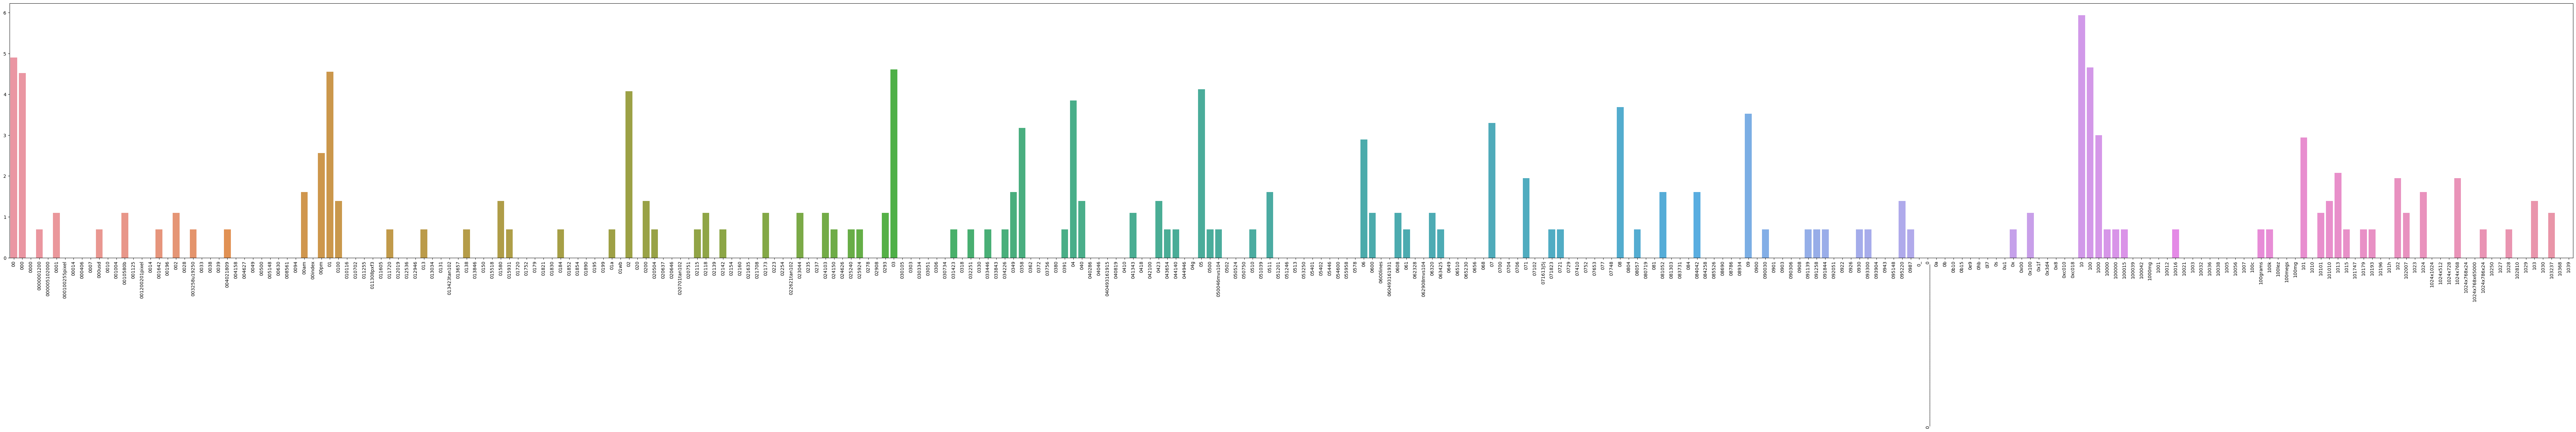

In [79]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

* 除了觀察到分佈的完全變化外，請注意y軸上的刻度。在我們未排序的範例中，對數分佈沒有意義，但嘗試按照它們的頻率適當地排序條款，你會看到一種有趣的效果。去做吧！

#### 5.6 Discretization and Binarization
* 在這個部分，我們將討論一種非常重要的預處理技術，用於轉換數據，特別是分類值，成為符合某些算法所需的特定格式。考慮到我們當前的原始數據集，我們希望將其中一個屬性`category_name`轉換為四個二元屬性。換句話說，我們正在取代類別名稱並以`n`不對稱二元屬性替換它。(ex: One Hot Encoding)

In [80]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [81]:
# 將 LabelBinarizer 物件化
mlb = preprocessing.LabelBinarizer()

In [82]:
print(X.category)

0       1
1       1
2       3
3       3
4       3
       ..
2252    2
2253    2
2254    2
2255    2
2256    2
Name: category, Length: 2257, dtype: int64


In [83]:
# 將 X.category 丟入 LabelBinarizer 進行訓練
mlb.fit(X.category)

LabelBinarizer()

In [84]:
# 將轉換 X 的category欄位做 One hot encoding 的轉換 並加入倒 bin_category 的新欄位
X['bin_category'] = mlb.transform(X['category']).tolist()

In [85]:
X[0:5]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"


* 看一下我們新增到`X`表格的新屬性。你可以看到，這個名為`bin_category`的新屬性包含了一組0和1的陣列。 `1`基本上是用來指示我們二元化的標籤或類別的位置。如果你看前兩筆記錄，其中一筆在陣列中位於第2個位置；這有助於向我們將此數據提供給任何算法指示該記錄屬於特定類別。
* 具有**連續值**的屬性也有轉換數據的策略；這通常被稱為**離散化**（請參考教科書以獲得更多信息）。

#### >>> **Exercise 16 (take home):**
* 嘗試使用`category_name`欄位來生成二元化。它有效嗎？

In [86]:
print(X.category_name)

0                comp.graphics
1                comp.graphics
2       soc.religion.christian
3       soc.religion.christian
4       soc.religion.christian
                 ...          
2252                   sci.med
2253                   sci.med
2254                   sci.med
2255                   sci.med
2256                   sci.med
Name: category_name, Length: 2257, dtype: object


In [87]:
# 將 X.category 丟入 LabelBinarizer 進行訓練
mlb.fit(X.category_name)

LabelBinarizer()

In [88]:
# 將轉換 X 的category欄位做 One hot encoding 的轉換 並加入倒 bin_category 的新欄位
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

In [89]:
# 完成
X[0:5]

,text,category,category_name,unigrams,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]","[0, 0, 0, 1]"


* 我們發現 category_name 是可以有效處理為One Hot Encoding的樣式，因為category_name與category相同都是離散資料，雖表現方式不同，但所要分類的目標是相同的答案，因此與前面 bin_category 欄位的資料會是相同的。

### 6. Data Exploration
* 有時候，你需要偷看一下你的數據，以理解數據集中的關係。在這裡，我們將專注於一個相似性的例子。讓我們拿出三份文件來比較它們。

In [90]:
# 假設有三個句子要了解其間的差異

# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
# print(random_record_1)
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [91]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['From: ab@nova.cc.purdue.edu (Allen B) Subject: Re: TIFF: philosophical significance of 42 Organization: Purdue University Lines: 39  In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin   Preston) writes: > Why not use the PD C library for reading/writing TIFF files? It took me a > good 20 minutes to start using them in your own app.  I certainly do use it whenever I have to do TIFF, and it usually works very well.  That\'s not my point.  I\'m >philosophically< opposed to it because of its complexity.  This complexity has led to some programs\' poor TIFF writers making some very bizarre files, other programs\' inability to load TIFF images (though they\'ll save them, of course), and a general inability to interchange images between different environments despite the fact they all think they understand TIFF.  As the saying goes, "It\'s not me I\'m worried about- it\'s all the >other<  assholes out there!"  I\'ve had big trouble with misuse and abuse of TIFF over 

In [92]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [93]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.608862
Cosine Similarity using count bw 1 and 3: 0.622050
Cosine Similarity using count bw 2 and 3: 0.565566
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


* 如預期的，一個句子與其自身的餘弦相似度為1。對於兩個完全不同的句子，它將是0。

我們可以假設在文件1和3中有比在文件1和2中更常見的特徵。這確實反映在比句子1和3之間的相似度更高。

## Part.2
* 2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

In [94]:
# (for windows)下載資料集且進行預處理
# import zipfile
# !pip install wget
# !python -m wget https://archive.ics.uci.edu/static/public/331/sentiment+labelled+sentences.zip
# !mkdir dataset
# import zipfile
# # 開啟 ZIP 壓縮檔
# with zipfile.ZipFile('sentiment+labelled+sentences.zip', 'r') as zf:
#     # 解壓縮所有檔案至 /my/folder 目錄
#     zf.extractall(path='./dataset/')

# (for linux or colab)下載資料集且進行預處理
# !wget https://archive.ics.uci.edu/static/public/331/sentiment+labelled+sentences.zip
# !mkdir dataset
# !unzip sentiment+labelled+sentences.zip -d -o ./dataset

In [95]:
import pandas as pd
import os
# 定義資料路徑、檔名(provider)
Current_dir = os.path.dirname(__file__) if "__file__" in locals() else "."
files = [("amazon", os.path.join(Current_dir, "dataset/sentiment labelled sentences/amazon_cells_labelled.txt")),
         ("imdb", os.path.join(Current_dir, "dataset/sentiment labelled sentences/imdb_labelled.txt")),
         ("yelp", os.path.join(Current_dir, "dataset/sentiment labelled sentences/yelp_labelled.txt"))]
# 將資料由pandas讀取近來
dfs = []
for provider, name in files:
    df = pd.read_csv(name, sep="\t")
    df.columns = ["sentance", "score"]
    df["provider"] = provider
    dfs.append(df)
#將三個資料庫結合起來
data = pd.concat(dfs, axis=0)
print(data.shape)
display(data[0:2])

(2745, 3)


,sentance,score,provider
0,"Good case, Excellent value.",1,amazon
1,Great for the jawbone.,1,amazon


In [96]:
# 目標欄位為數值
print(data.score[0])
print("-----")
# 前十個目標類別數值
print(data.provider[0:10])
print("-----")

0    1
0    0
0    0
Name: score, dtype: int64
-----
0    amazon
1    amazon
2    amazon
3    amazon
4    amazon
5    amazon
6    amazon
7    amazon
8    amazon
9    amazon
Name: provider, dtype: object
-----


### >>> Exercise 1 (5 min):
* 在這個練習中，請列印出數據集中前三個樣本的 text 數據。 (參見上面的代碼以取得幫助)

In [97]:
for t in data.sentance[0:3]:
    print(t)
    print("---------------")

Good case, Excellent value.
---------------
Great for the jawbone.
---------------
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
---------------


### >>> Exercise 2 (take home):
* 使用pandas進行其他方法來查詢。

In [98]:
# 直接查詢前五筆資料
display(data.head())
print("-------")

# 僅篩選欄位"provider"是"amazon, yelp"倆值的前五筆資料並使用isin()來篩選器
filter_category = ["amazon","yelp"]
filter_val = data["provider"].isin(filter_category)
display(data.loc[filter_val,["sentance","score","provider"]])
print("-------")

# 篩選關鍵字(ex:'Great') 於全部資料
filter = data['sentance'].str.contains("Great", na=False)
display(data.loc[filter_val , ["sentance","score"]])
print("-------")

,sentance,score,provider
0,"Good case, Excellent value.",1,amazon
1,Great for the jawbone.,1,amazon
2,Tied to charger for conversations lasting more...,0,amazon
3,The mic is great.,1,amazon
4,I have to jiggle the plug to get it to line up...,0,amazon


-------


,sentance,score,provider
0,"Good case, Excellent value.",1,amazon
1,Great for the jawbone.,1,amazon
2,Tied to charger for conversations lasting more...,0,amazon
3,The mic is great.,1,amazon
4,I have to jiggle the plug to get it to line up...,0,amazon
...,...,...,...
994,I think food should have flavor and texture an...,0,yelp
995,Appetite instantly gone.,0,yelp
996,Overall I was not impressed and would not go b...,0,yelp
997,"The whole experience was underwhelming, and I ...",0,yelp


-------


,sentance,score
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0
...,...,...
994,I think food should have flavor and texture an...,0
995,Appetite instantly gone.,0
996,Overall I was not impressed and would not go b...,0
997,"The whole experience was underwhelming, and I ...",0


-------


### >>> Exercise 3 (5 min):
* 嘗試獲取score屬於 "1"類別的記錄，並查詢每10個記錄。只顯示前5個記錄。

In [99]:
data[data["score"]==1].iloc[::10][0:5]

,sentance,score,provider
0,"Good case, Excellent value.",1,amazon
20,I bought this to use with my Kindle Fire and a...,1,amazon
43,Excellent bluetooth headset.,1,amazon
60,I really recommend this faceplates since it lo...,1,amazon
77,"I love this phone , It is very handy and has a...",1,amazon


In [100]:
# check missing values
data.isnull()

,sentance,score,provider
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
994,False,False,False
995,False,False,False
996,False,False,False
997,False,False,False


In [101]:
# my functions (自訂義工具)
# check_missing_values 函數查看資料集中的每個欄位（屬性或列）並計算找到了多少缺失值。
import helpers.data_mining_helpers as dmh
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentance,score,provider
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### >>>Exercise 4 (5 min):
* 我們來嘗試些不同的事情。與其按照行計算缺失值，不如嘗試在每列記錄中計算缺失值，而非每一列。
    *提示：`axis` 參數。查閱文檔以獲取更多信息。

In [102]:
data.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
994    (The amoung of missing records is: , 0)
995    (The amoung of missing records is: , 0)
996    (The amoung of missing records is: , 0)
997    (The amoung of missing records is: , 0)
998    (The amoung of missing records is: , 0)
Length: 2745, dtype: object

In [103]:
# 可以直接將更改適用於X並將其分配給它本身,此修改會創建出需要稍後刪除此虛擬記錄的需求
# dummy record as dictionary format
dummy_dict = [{'sentance': 'TEST_record',
               'score': 0
              }]
data = pd.concat([data, pd.DataFrame(dummy_dict)], ignore_index=True)
print(len(data))
data.isnull().apply(lambda x: dmh.check_missing_values(x))

2746


,sentance,score,provider
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [104]:
# 數據中有缺失值，我們希望刪除具有缺失值的記錄。
# 要刪除剛剛添加的含有缺失值的記錄，代碼如下：
data.dropna(inplace=True)
# 現在讓我們測試看看，我們是否已經去除了含有缺失值的記錄。
print(len(data))
data.isnull().apply(lambda x: dmh.check_missing_values(x))

2745


,sentance,score,provider
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


###  >>> Exercise 5 (take home)
* 有一句老話說，"魔鬼藏在細節之中。"當我們處理極大的數據時，逐一檢查記錄變得困難（就像我們到目前為止所做的那樣）。而且，我們甚至不知道面對的是哪種類型的缺失值。因此，“除錯”...以下過程中，描述你觀察到了什麼以及為何會發生。
* 提示： 為何 `.isnull()` 沒有效果？

In [105]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
display(NA_df)
NA_df['missing_example'].isnull()

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [106]:
# Answer here
# 我們從panda文件中發現，.isnull()函數，檢查物件是否為空值或缺失值。
# 若為空值或缺失值則返回True
# 例如:資料類型為缺失值(非字串)np.nan, none
print("index_0:",type(NA_df["missing_example"][0]))
print("index_4:",type(NA_df["missing_example"][4]))
# 例如:資料類型為空值(非字串)
print("index_1:",type(NA_df["missing_example"][1]))
print("*-----------")
# 然而我們從剩下選項中發現，其資料類型為字串
print("index_2:",type(NA_df["missing_example"][2]))
print("index_3:",type(NA_df["missing_example"][3]))
print("index_5:",type(NA_df["missing_example"][5]))
# 我們可以得知即使列印出來為空值或為缺失值，但當該資料類型為字串時
# 其.isnull()函數仍會返回false, 並不會判斷為缺失值

index_0: <class 'float'>
index_4: <class 'NoneType'>
index_1: <class 'float'>
*-----------
index_2: <class 'str'>
index_3: <class 'str'>
index_5: <class 'str'>


In [107]:
# Dealing with Duplicate Data
#  首先，讓我們檢查目前的資料集中有多少重複的數據。
# 以下是用來檢查重複數據的程式碼行。
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2740    False
2741    False
2742    False
2743    False
2744    False
Length: 2745, dtype: bool

In [108]:
# 我們也可以通過簡單的操作來檢查重複記錄的總和：
#duplicated()操作做的就是逐條記錄檢查而不是逐列檢查。
# 可以發現有重複的評論
data.duplicated().sum()

17

In [109]:
# 如果我們想要像上面那樣對某些特定列進行重複性檢查，而不是所有列
# 現在，讓我們創建一些重複的虛擬記錄並將其附加到主數據框`X`。
# 隨後，讓我們嘗試消除重複項。
dummy_duplicate_dict = [{
                             'sentance': 'TEST_record',
                             'score': 0
                        },
                        {
                             'sentance': 'TEST_record',
                             'score': 0
                        }]
data = pd.concat([data, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)
print(len(data))
print(data.duplicated().sum())

2747
18


In [110]:
# 我們已將虛擬重複項添加到X中。
# 現在，我們面臨的決定是在找到重複記錄後該如何處理。
# 在我們的情況下，我們希望去除所有重複的記錄，而不保留。
data.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
len(data)

2711

In [111]:
# Sampling
# 讓我們來了解如何使用pandas操作進行取樣。
print(data.shape, type(data) ,sep="\n")
X_sample = data.sample(n=1000,random_state=42) #random state
display(X_sample)

(2711, 3)
<class 'pandas.core.frame.DataFrame'>


,sentance,score,provider
2718,The food wasn't good.,0,yelp
2507,"The chicken dishes are OK, the beef is like sh...",0,yelp
497,Bad Purchase.,0,amazon
303,Everything worked on the first try.The device ...,1,amazon
1387,There is no plot here to keep you going in the...,0,imdb
...,...,...,...
1213,The camera really likes her in this movie.,1,imdb
877,Does not work for listening to music with the ...,0,amazon
1251,"Not frightening in the least, and barely compr...",0,imdb
857,"If I take a picture, the battery drops a bar, ...",0,amazon


In [112]:
print(len(X_sample))
display(X_sample[0:4])

1000


,sentance,score,provider
2718,The food wasn't good.,0,yelp
2507,"The chicken dishes are OK, the beef is like sh...",0,yelp
497,Bad Purchase.,0,amazon
303,Everything worked on the first try.The device ...,1,amazon


### >>>Exercise 6 (take home):
* 從`X`資料框轉變到`X_sample`資料框，有注意到任何改變嗎？它們是什麼？請報告你所注意到的每一項與`X`先前狀態相比的改變。隨時查詢並更仔細地觀察這些在資料框中的變化。

(1000, 3)


,sentance,score,provider
2718,The food wasn't good.,0,yelp
2507,"The chicken dishes are OK, the beef is like sh...",0,yelp
497,Bad Purchase.,0,amazon
303,Everything worked on the first try.The device ...,1,amazon


,sentance,score,provider
1667,"Not much dialogue, not much music, the whole f...",1,imdb
2736,Spend your money and time some place else.,0,yelp
1037,I don't think you will be disappointed.,1,imdb
1793,If you want a sandwich just go to any Firehous...,1,yelp


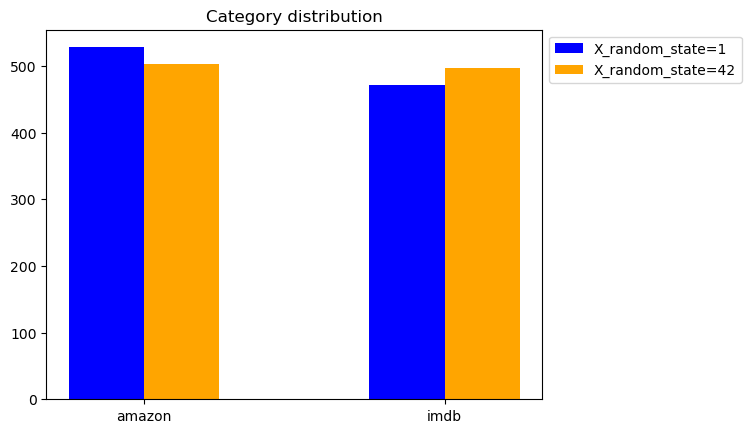

In [113]:
# 首先我們對X資料從2257採樣至1000。維度上，樣本數下降，但欄位數不變
print(X_sample.shape)
# 當中我們設定不同的 random_state 其採樣的樣本及順序也不同，例如:
X_sample_42 = data.sample(n=1000,random_state=42)
display(X_sample_42[0:4])
X_sample_1 = data.sample(n=1000,random_state=1)
display(X_sample_1[0:4])
# 可以發現與之前 random_state=42 的時候不同。
# 承上，雖然取樣的 random_state 的亂數參數不同導致取樣不同,但統計後從圖上可以觀察到，
# 其各個類別的採樣數量及分布是差不多的。
import matplotlib.pyplot as plt
%matplotlib inline

categories = ['amazon', 'imdb']

X_counts = data.sample(n=1000,random_state=1).score.value_counts()
X_sample_counts = data.sample(n=1000,random_state=42).score.value_counts()
X_categories = np.arange(len(categories))

width = 0.25
plt.bar(X_categories, X_counts, width, color='blue', label='X_random_state=1')
plt.bar(X_categories + width, X_sample_counts, width, color='orange', label='X_random_state=42')
plt.xticks(X_categories + width /2, categories)
plt.title('Category distribution')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

* 從樣本和原始數據集中類別的分佈，我們來視覺化並分析兩組數據集之間的差異。為了產生一些視覺化效果，我們將使用`matplotlib`這個python library。

In [114]:
# 讓我們來看看樣本和原始數據集中類別的分佈
import matplotlib.pyplot as plt
%matplotlib inline
# 所使用的分類類別
categories = [0, 1]
print(data.score.value_counts())

1    1365
0    1346
Name: score, dtype: int64


<Axes: title={'center': 'Scores distribution'}>

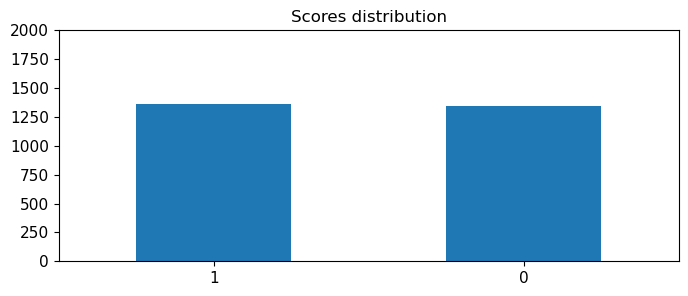

In [115]:
# 原樣本: plot barchart for X
data.score.value_counts().plot(kind = 'bar',
                               title = 'Scores distribution',
                               ylim = [0, 2000],
                               rot = 0, fontsize = 11, figsize = (8,3))

0    503
1    497
Name: score, dtype: int64


<Axes: title={'center': 'Scores distribution'}>

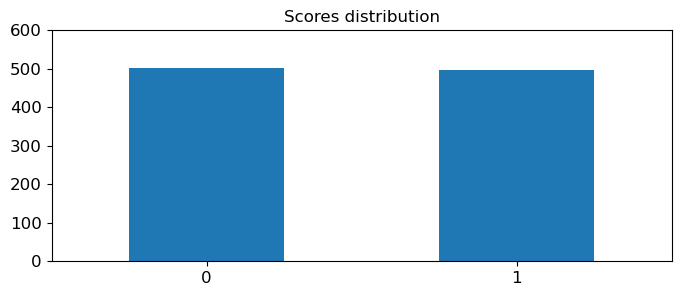

In [116]:
print(X_sample.score.value_counts())

# 抽樣樣本: plot barchart for X_sample
X_sample.score.value_counts().plot(kind = 'bar',
                                   title = 'Scores distribution',
                                   ylim = [0, 600],
                                   rot = 0, fontsize = 12, figsize = (8,3))

### >>>Exercise 7 (5 min):
* 請注意，對於`ylim`參數，我們硬編碼了y的最大值。是否有可能自動化這個過程，而不是硬編碼呢？你會如何去做呢？（提示：查看上面的代碼以獲得線索）

503
0    503
1    497
Name: score, dtype: int64


<Axes: title={'center': 'Scores distribution'}>

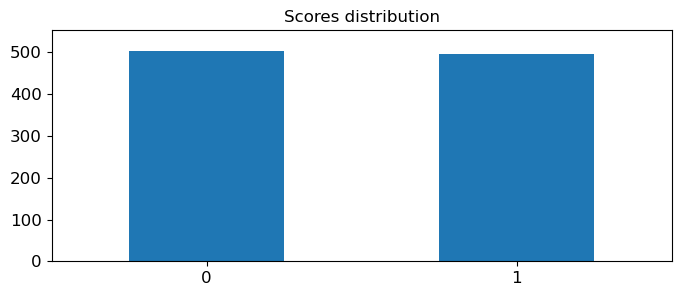

In [117]:
# Answer here
# plot barchart for X_sample
print(max(X_sample.score.value_counts()))
upper_bound = max(X_sample.score.value_counts() + 50) #277 + 50
print(X_sample.score.value_counts())

X_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'Scores distribution',
                                           ylim = [0, upper_bound],
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>>Exercise 8 (take home):
* 我們也可以做兩組數據集之間分佈的並列比較，但或許你可以試著將其當作一項練習。以下我們展示了我們正在尋找的圖表類型的快照。

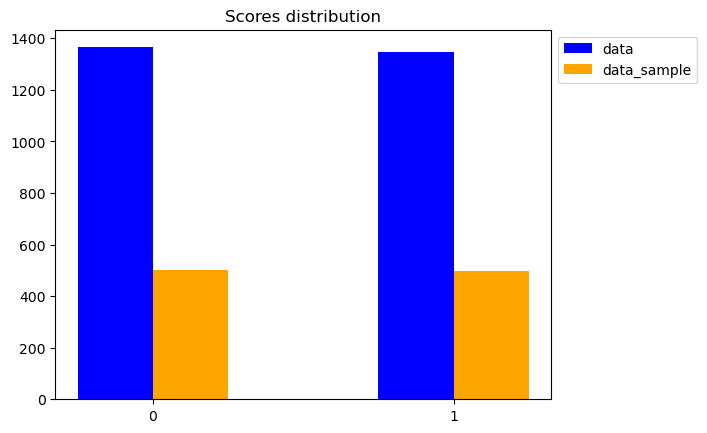

In [118]:
X_counts = data.score.value_counts()
X_sample_counts = X_sample.score.value_counts()
categories = [0, 1]
X_categories = np.arange(len(categories))
width = 0.25
plt.bar(X_categories, X_counts, width, color='blue', label='data')
plt.bar(X_categories + width, X_sample_counts, width, color='orange', label='data_sample')
plt.xticks(X_categories + width /2, categories)
plt.title('Scores distribution')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

In [119]:
# Feature Creation
# 載入模組
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tsuchida\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [120]:
data['unigrams'] = data['sentance'].apply(lambda x: dmh.tokenize_text(x))

In [121]:
data[0:4]["unigrams"]

0                 [Good, case, ,, Excellent, value, .]
1                        [Great, for, the, jawbone, .]
2    [Tied, to, charger, for, conversations, lastin...
3                             [The, mic, is, great, .]
Name: unigrams, dtype: object

In [122]:
data[0:4]

,sentance,score,provider,unigrams
0,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
1,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
2,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."
3,The mic is great.,1,amazon,"[The, mic, is, great, .]"


In [123]:
list(data[0:1]['unigrams'])

[['Good', 'case', ',', 'Excellent', 'value', '.']]

In [124]:
# Feature subset selection
from sklearn.feature_extraction.text import CountVectorizer
# print(X.text)
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data.sentance) #learn the vocabulary and return document-term matrix
print(type(X_counts)) # document-term matrix
print(X_counts.shape) # 共有35788 字、符號
print(X_counts[0])

<class 'scipy.sparse._csr.csr_matrix'>
(2711, 5149)
  (0, 1988)	1
  (0, 711)	1
  (0, 1598)	1
  (0, 4855)	1


In [125]:
print(count_vect.get_feature_names_out()[1988])
print(count_vect.get_feature_names_out()[711])
print(count_vect.get_feature_names_out()[1598])
print(count_vect.get_feature_names_out()[4855])

good
case
excellent
value


In [126]:
data.sentance[0]

'Good case, Excellent value.'

In [127]:
# 建立分析器
# count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
analyze(data.sentance[0])
# stop words (無意義符號而且重複的字串)

['good', 'case', 'excellent', 'value']

### >>> Exercise 9 (5 min):
* 讓我們用剛剛建立的新分析器來分析我們X數據框的第一筆記錄。去試試看吧！

In [128]:
analyze(data.sentance[1])

['great', 'for', 'the', 'jawbone']

In [129]:
# print((list(X[:1].text))) # 每個字皆用空白作為分斷
analyze(" ".join(list(data[:1].sentance)))

['good', 'case', 'excellent', 'value']

In [130]:
# 現在讓我們來看看我們上面建立的詞彙-文件矩陣。
# We can check the shape of this matrix by:
print(X_counts.shape)

(2711, 5149)


In [131]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:20]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17',
       '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973',
       '1979', '1980'], dtype=object)

In [132]:
# we convert from sparse array to normal array
X_counts[:10, 4855:4955].toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [133]:
count_vect.get_feature_names_out()[4855]

'value'

### >>>Exercise 10 (take home):
* 我們說過，第一筆記錄開頭的`1`代表了`value`這個詞彙。注意同一筆記錄中還有另一個1。你能提供可以驗證這個1代表詞彙表中什麼字的程式碼嗎？請盡可能地做到效率最高。

In [134]:
# count_vect.get_feature_names_out()[0:1]
# 建立物件
matrix = X_counts[:10, 4855:4955].toarray()
# 透過 numpy.where 查詢第五筆陣列記錄內所有 1 的索引
print(np.where(matrix[4]==1))
# 原來開頭位置0之外，還有另一個在第37索引值，便能查出另一個該值的代表詞彙("01")了
count_vect.get_feature_names_out()[67]

(array([67], dtype=int64),)


'95'

* 為了讓您開始思考如何更好地分析您的數據或轉換，讓我們來看看我們詞彙-文件矩陣的這張漂亮的小熱點圖。當你從一個不同的角度開始觀察數據時，可能會驚訝地發現你可以挖掘到的寶藏。視覺化就是出於這個原因而有用。

In [135]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[4855:4875]]
print(plot_x)
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]
print(plot_y)

['term_value', 'term_values', 'term_vampire', 'term_vandiver', 'term_vanilla', 'term_variation', 'term_ve', 'term_veal', 'term_vegan', 'term_vegas', 'term_vegetables', 'term_vegetarian', 'term_veggie', 'term_veggitarian', 'term_vehicle', 'term_vehicles', 'term_velvet', 'term_ventilation', 'term_ventura', 'term_venture']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_18', 'doc_19', 'doc_20']


In [136]:
plot_z = X_counts[0:20, 4855:4875].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


,term_value,term_values,term_vampire,term_vandiver,term_vanilla,term_variation,term_ve,term_veal,term_vegan,term_vegas,term_vegetables,term_vegetarian,term_veggie,term_veggitarian,term_vehicle,term_vehicles,term_velvet,term_ventilation,term_ventura,term_venture
doc_0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


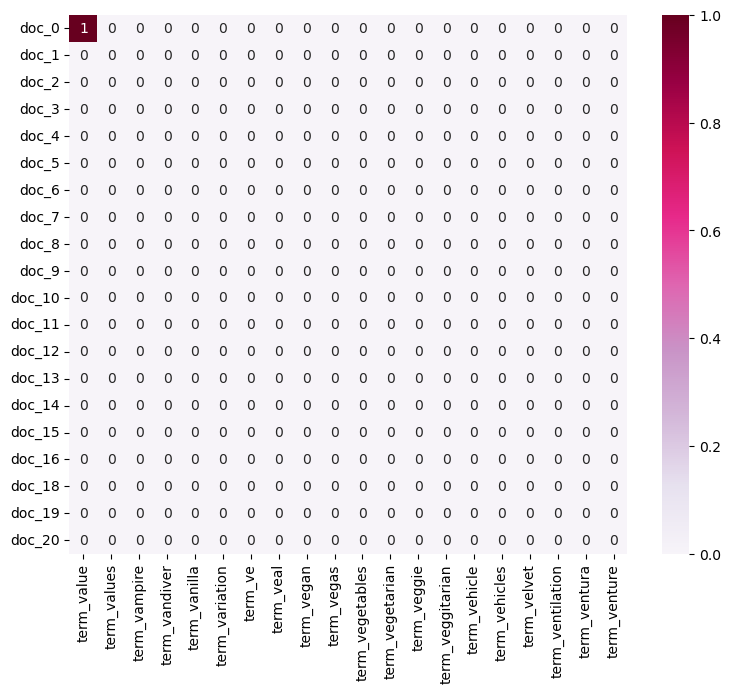

In [137]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>>Exercise 11 (take home):
* 從上面的圖表中，我們可以看到詞彙-文件矩陣有多麼稀疏；也就是說，在矩陣的子選擇中只有一個詞彙的頻率為`1`。順便提一下，你可能已經注意到我們只選擇了20篇文章和20個詞彙來畫直方圖。作為一項運動，你可以嘗試修改上面的代碼以畫出整個詞彙-文件矩陣或僅其樣本。你會如何有效地做到這一點呢？請記住，字典裡有很多單詞。在下面報告您將使用哪些方法來得到一個好且有用的視覺化

(20, 20)
['and' 'for' 'from' 'get' 'good' 'great' 'have' 'if' 'is' 'it' 'not' 'of'
 'one' 'quality' 'several' 'the' 'this' 'to' 'very' 'you']
['term_and', 'term_for', 'term_from', 'term_get', 'term_good', 'term_great', 'term_have', 'term_if', 'term_is', 'term_it', 'term_not', 'term_of', 'term_one', 'term_quality', 'term_several', 'term_the', 'term_this', 'term_to', 'term_very', 'term_you']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_18', 'doc_19', 'doc_20']
[[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 2 0 0 1 0 0 1 0 0 0 0 0 1 0 4 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 2 2 0 2 1 0 0 0 1]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 1 0 0 0 0 1

,term_and,term_for,term_from,term_get,term_good,term_great,term_have,term_if,term_is,term_it,term_not,term_of,term_one,term_quality,term_several,term_the,term_this,term_to,term_very,term_you
doc_0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
doc_2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
doc_3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
doc_4,0,0,0,2,0,0,1,0,0,1,0,0,0,0,0,1,0,4,0,0
doc_5,0,0,0,0,0,0,1,1,0,0,0,2,2,0,2,1,0,0,0,1
doc_6,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,2
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
doc_8,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
doc_9,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0


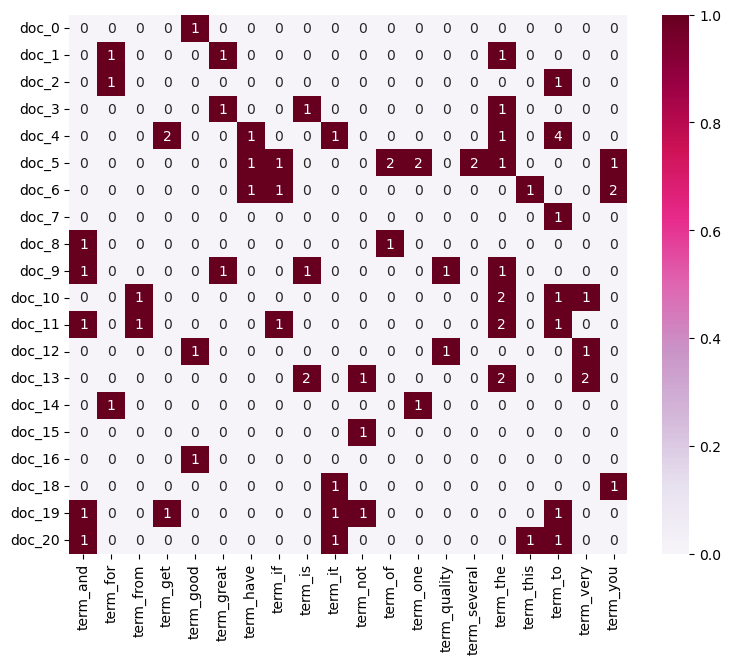

In [138]:
# 目的: 找出最頻繁出現的20個詞彙來得到比較好且有用的資訊
# 首先我們利用CountVectorizer的參數max_features 來設定我們找出最頻繁出現的20個詞彙
coun_vect_pra = CountVectorizer(max_features=20)
# 帶入20篇文章成立矩陣
count_matrix_pra = coun_vect_pra.fit_transform(data.sentance[0:20])
# 我們可以發現矩陣維度為(20,20)
print(count_matrix_pra.shape)
# 列出最頻繁出現的20個詞彙
print(coun_vect_pra.get_feature_names_out()[0:20])
# count_matrix_pra[0:20, 0:20].toarray()
# X軸為前20個詞彙項目
plot_x = ["term_"+str(i) for i in coun_vect_pra.get_feature_names_out()[0:20]]
print(plot_x)
# 獲得 document index
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]
print(plot_y)
# 建立前20篇文章和最常出現的20個詞彙矩陣
plot_z = count_matrix_pra[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)
# 使用seaborn來建立heatmap
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**Input:** Raw term-vector matrix

**Output:** Projections

In [139]:
from sklearn.decomposition import PCA

print(X_counts.shape)
# 透過PCA降低維度為2
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2711, 5149)
(2711, 2)


In [140]:
print(categories)
print(X_reduced)

[0, 1]
[[-1.02899057  0.02879676]
 [-0.28950783 -0.0087123 ]
 [-0.83939336  0.09971957]
 ...
 [-0.5160487  -0.57747401]
 [ 0.3077767  -0.75754489]
 [ 2.16827996  0.35027917]]


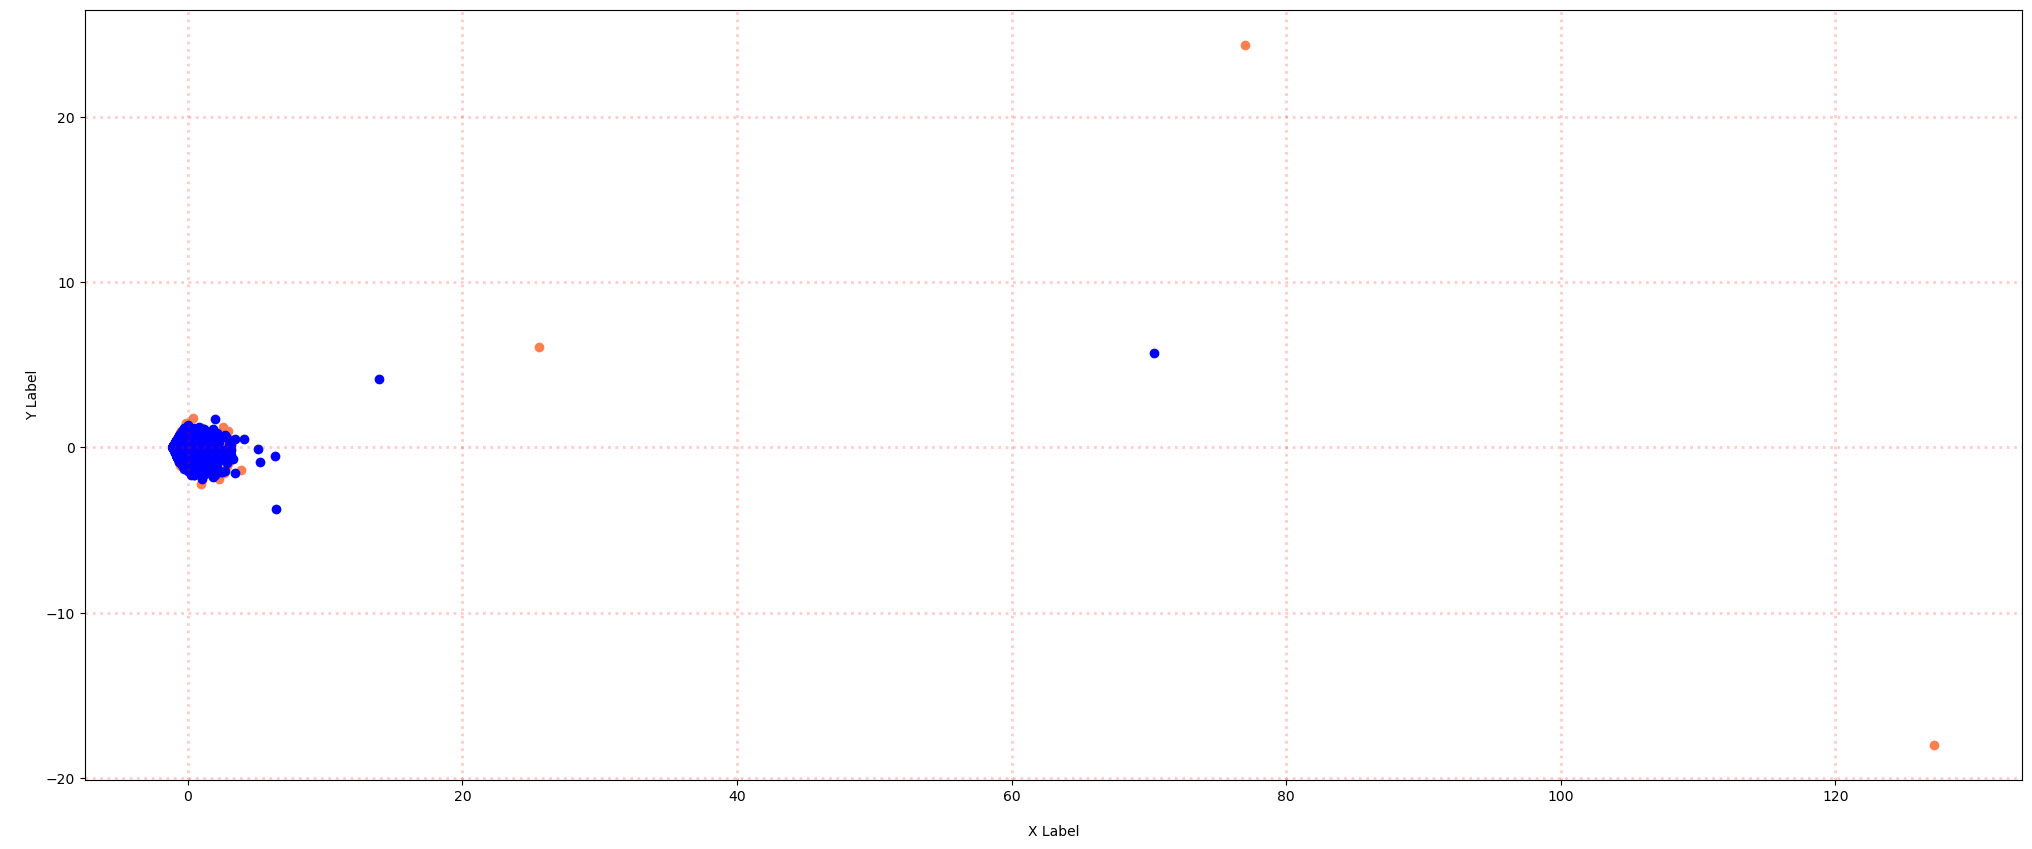

In [141]:
# plots四種顏色
col = ['coral', 'blue', 'black', 'orange']
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()
for c, category in zip(col, categories):
    xs = X_reduced[data['score'] == category].T[0]
    ys = X_reduced[data['score'] == category].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='red', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
plt.show()

### >>>Exercise 12 (take home):
* 請嘗試將維度降至3，並使用3-D圖形來繪製結果。請至少從三個不同的角度（攝像機位置）來檢查您的結果，並描述您發現了什麼。

$提示$：你可以參考文檔中的Axes3D。

In [142]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_pca = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_pca.shape)

(2711, 3)


view plane: YZ


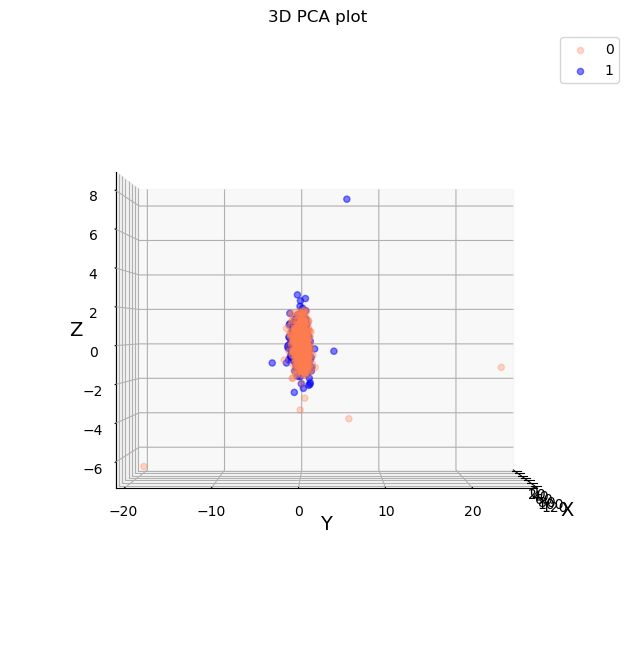

view plane: XY


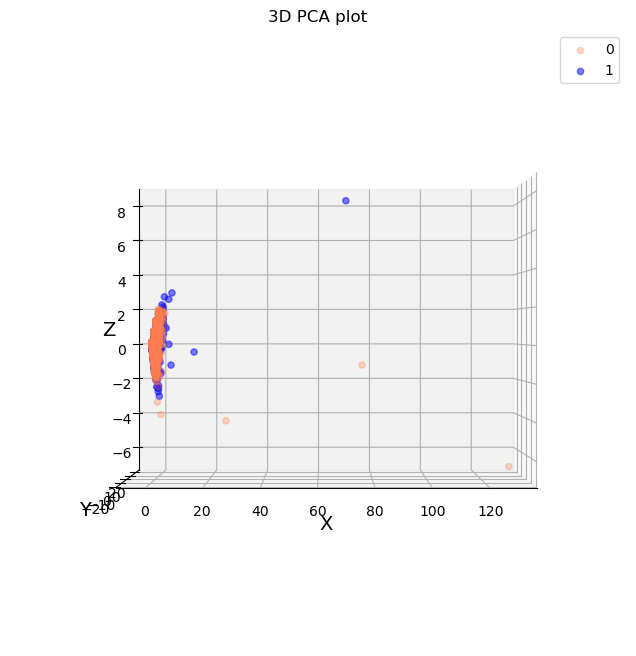

view plane: YZ:45


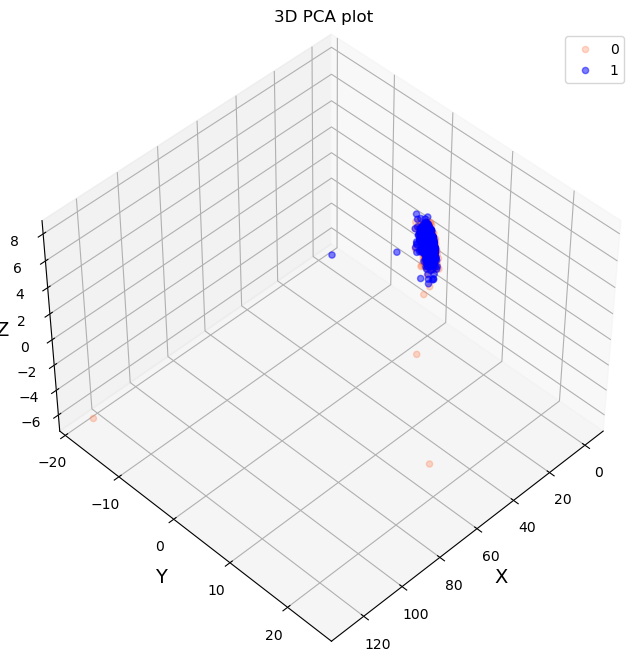

view plane: default


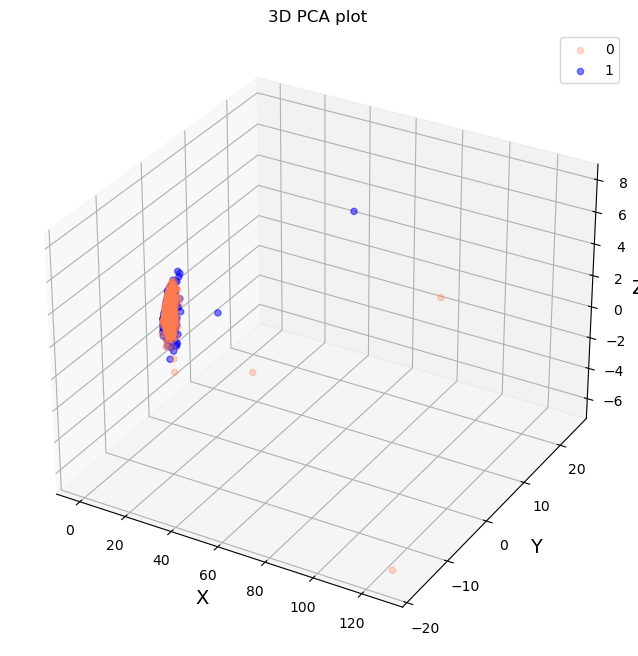

In [143]:
# 設定函數PCA_3D來繪圖，參數可設各種角度
def PCA_3D(elev=None, azim=None):
    # 影像大小及其他設定
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(1,1,1, projection='3d')
    fig.patch.set_facecolor('white')
    # 顏色
    col = ['coral', 'blue', 'black', 'orange']
    categories = [0, 1]
    alpha=[0.3,0.5,0.7,0.9]

    for c, category, a in zip(col, categories, alpha):
        xs = X_pca[data['score'] == category].T[0]
        ys = X_pca[data['score'] == category].T[1]
        zs = X_pca[data['score'] == category].T[2]

        ax.scatter(xs, ys, zs,c = c,label=category ,marker='o',alpha=a)

    # 設定標籤
    ax.set_xlabel("X", fontsize=14)
    ax.set_ylabel("Y", fontsize=14)
    ax.set_zlabel("Z", fontsize=14)
    ax.zaxis.labelpad = -0.7
    ax.legend()
    plt.title("3D PCA plot")
    # 設定比例縮放
    ax.set_box_aspect(aspect=None, zoom=1)
    ax.view_init(elev=elev,azim=azim)
    plt.show()

print("view plane: YZ")
PCA_3D(elev=0, azim=0)
print("view plane: XY")
PCA_3D(elev=0, azim=-90)
print("view plane: YZ:45")
PCA_3D(elev=45, azim=45)
print("view plane: default")
PCA_3D()

In [144]:
# Attribute Transformation / Aggregation
# 請注意，這需要時間來計算。您可能希望減少您想要計算頻率的項目數量。
#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]
# 此欄可直接跳過改用np來計算總合
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(X_counts[:,j].toarray().sum())

5149


In [145]:
#使用np工具來達成計算，因原來是二維的矩陣，我們只求第一個為陣列
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
print(term_frequencies[0]) #sum of first term: 00
print(term_frequencies)
print(count_vect.get_feature_names_out())

1
[ 1 34  3 ...  1  2  1]
['00' '10' '100' ... 'zillion' 'zombie' 'zombiez']


[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


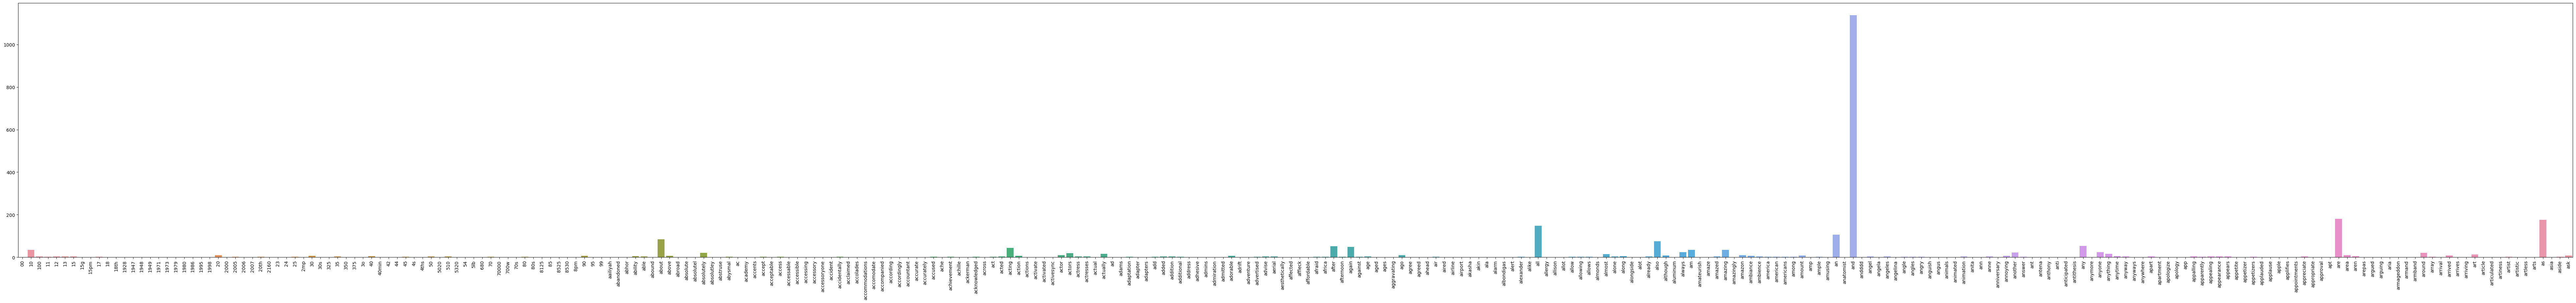

In [146]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### >>> **Exercise 13 (take home):**
* 如果你想要更漂亮的互動式可視化，我建議你嘗試安裝並使用plotly來實現這一目標。

In [147]:
!pip install chart-studio

Defaulting to user installation because normal site-packages is not writeable


In [148]:
import pandas as pd
import plotly.graph_objs as go
# 建立ㄌX&Y軸
x = count_vect.get_feature_names_out()[:300]
y = term_frequencies[:300]
trace = go.Bar(x=x,y=y,name="詞彙出現次數")
# 建立標籤
layout = go.Layout(title="詞彙出現頻率分析",xaxis={"title":"詞彙特徵"},
    yaxis={"title":"次數"},barmode="group")
fig = go.Figure(data = [trace],layout=layout)
fig.show()

### >>> **Exercise 14 (take home):**
* 上述圖表只包含文件中的300個詞彙，並且已經對計算和視覺化產生了大量的計算壓力。作為一項練習，你能否有效地減少你想要視覺化的術語數量。


In [149]:
# 目的: 僅選出頻率大於1的詞彙來更有效的視覺化數量
# 首先將300個詞彙與相對出現次數結合成(300,2)的維度
x = np.asarray(count_vect.get_feature_names_out()[:300]).reshape((300,1))
y = term_frequencies[:300].reshape((300,1))
sum =  np.hstack((x, y))
# 僅選出出現次數大於1的詞彙
feature_names=[]
frequencies=[]
for j in range(0,sum.shape[0]):
    if sum[j,1]>1:
        feature_names.append(sum[j,0])
        frequencies.append(sum[j,1])
# 將選出的詞彙和出現次數視覺化
x = feature_names
y = frequencies
trace = go.Bar(x=x,y=y,name="詞彙出現次數")
layout = go.Layout(title="僅選出詞彙頻率大於1",xaxis={"title":"詞彙特徵"},
    yaxis={"title":"頻率"},barmode="group")

fig = go.Figure(data = [trace],layout=layout)
fig.show()

### >>> **Exercise 15 (take home):**
此外，您可以嘗試按照頻率而非字母順序來對`x軸`上的條件進行排序。這樣，視覺化會更有意義，您將能夠觀察到所謂的[long tail](https://en.wikipedia.org/wiki/Long_tail)（由於它在數據挖掘和其他統計課程中會出現很多次，因此需要熟悉這個術語）。見下圖
![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [150]:
# 將詞彙出現頻率分析:從大到小排列且詞彙頻率大於1
# 首先將300個詞彙與相對出現次數結合成(300,2)的維度
x = np.asarray(count_vect.get_feature_names_out()[:300]).reshape((300,1))
y = term_frequencies[:300].reshape((300,1))
sum =  np.hstack((x, y))
# 將出現次數的詞彙由大到小排列
sum_sorted = np.array(sorted(sum, key=lambda row: row[1], reverse=True))
# 且僅選出出現次數大於1的詞彙
feature_names=[]
frequencies=[]
for j in range(0,sum_sorted.shape[0]):
    if sum_sorted[j,1]>1:
        feature_names.append(sum_sorted[j,0])
        frequencies.append(sum_sorted[j,1])
# 將重新排列的詞彙和出現次數視覺化
x = feature_names
y = frequencies
trace = go.Bar(x=x,y=y,name="詞彙出現次數")
layout = go.Layout(title="從大到小排列且詞彙頻率大於1",xaxis={"title":"詞彙特徵"},
    yaxis={"title":"頻率"},barmode="group")

fig = go.Figure(data = [trace],layout=layout)
fig.show()

* 既然我們已經有了這些詞頻，我們也可以將向量中的值轉換成對數分佈。我們需要做的就是引入由python提供的`math`庫並應用於詞頻向量的值陣列。

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


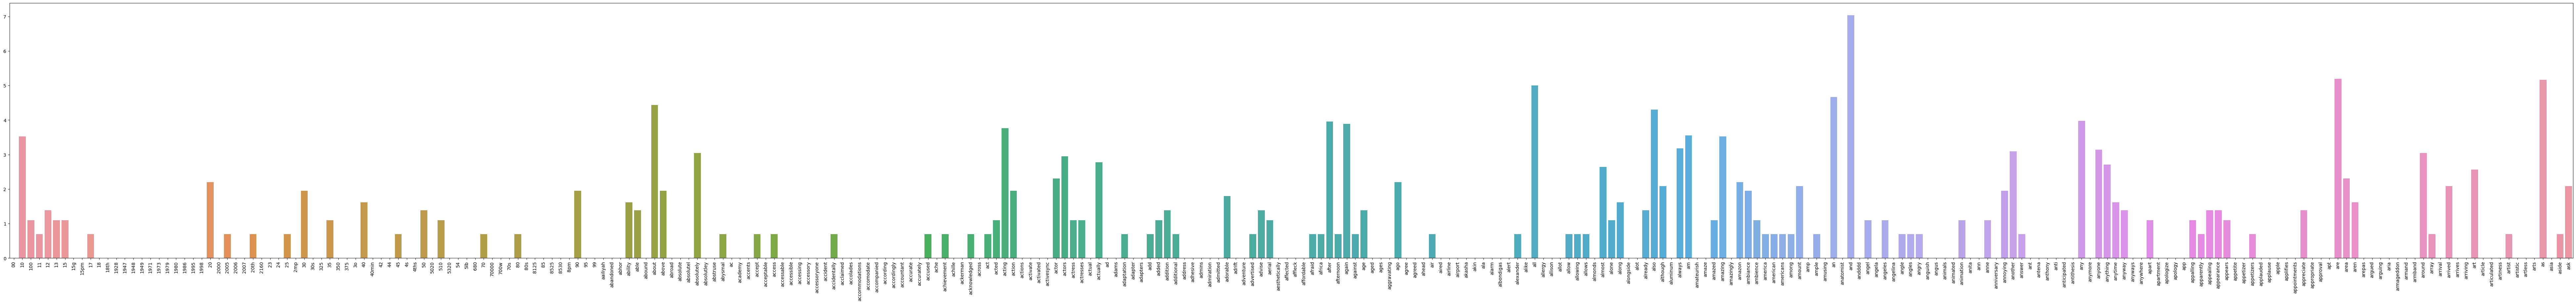

In [151]:
import math
# 將頻率轉換log
term_frequencies_log = [math.log(i) for i in term_frequencies]
# 製圖
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [152]:
# Discretization and Binarization
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
# 將 LabelBinarizer 物件化
mlb = preprocessing.LabelBinarizer()
print(data.score)

0       1
1       1
2       0
3       1
4       0
       ..
2740    0
2741    0
2742    0
2743    0
2744    0
Name: score, Length: 2711, dtype: int64


In [153]:
# 將 X.category 丟入 LabelBinarizer 進行訓練
mlb.fit(data.score)

LabelBinarizer()

In [154]:
# 將轉換 X 的category欄位做 One hot encoding 的轉換 並加入倒 bin_category 的新欄位
data['bin_provider'] = mlb.transform(data['score']).tolist()
data[0:5]

,sentance,score,provider,unigrams,bin_provider
0,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]",[1]
1,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]",[1]
2,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin...",[0]
3,The mic is great.,1,amazon,"[The, mic, is, great, .]",[1]
4,I have to jiggle the plug to get it to line up...,0,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]


### >>> **Exercise 16 (take home):**
* 嘗試使用`provider`欄位來生成二元化。它有效嗎？

In [155]:
print(data.provider)

0       amazon
1       amazon
2       amazon
3       amazon
4       amazon
         ...  
2740      yelp
2741      yelp
2742      yelp
2743      yelp
2744      yelp
Name: provider, Length: 2711, dtype: object


In [156]:
mlb.fit(data.provider)

LabelBinarizer()

In [157]:
# 將轉換 X 的category欄位做 One hot encoding 的轉換 並加入倒 bin_category 的新欄位
data['bin_provider'] = mlb.transform(data['provider']).tolist()
# 完成
data[0:5]

,sentance,score,provider,unigrams,bin_provider
0,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
1,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]"
2,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
3,The mic is great.,1,amazon,"[The, mic, is, great, .]","[1, 0, 0]"
4,I have to jiggle the plug to get it to line up...,0,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"


* Data Exploration

In [158]:
# Data Exploration
# 假設有三個句子要了解其間的差異

# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = data.iloc[50]
# print(random_record_1)
random_record_1 = random_record_1['sentance']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['sentance']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['sentance']
document_to_transform_3.append(random_record_3)

In [159]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['A usable keyboard actually turns a PDA into a real-world useful machine instead of just a neat gadget.']
['Definitely a bargain.']
['I had absolutely no problem with this headset linking to my 8530 Blackberry Curve!']


In [160]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [161]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


## Part.3
3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

(2745, 3)


,sentance,score,provider,word_count,char_count
0,"Good case, Excellent value.",1,amazon,4,24
1,Great for the jawbone.,1,amazon,4,19
2,Tied to charger for conversations lasting more...,0,amazon,11,69
3,The mic is great.,1,amazon,4,14
4,I have to jiggle the plug to get it to line up...,0,amazon,17,58


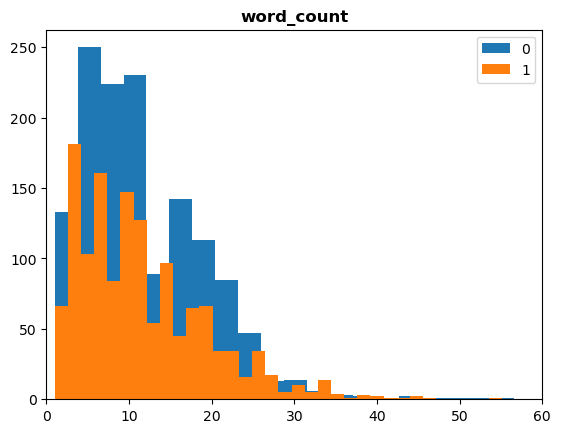

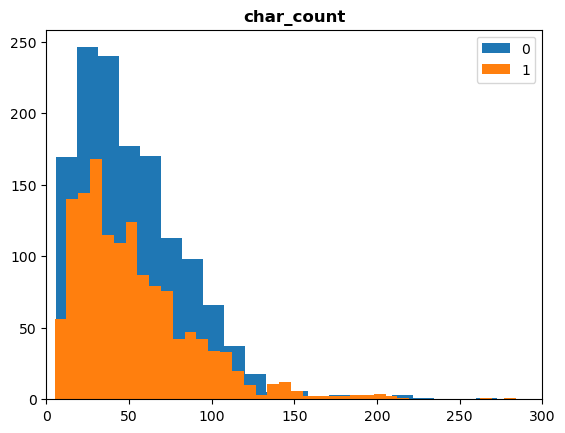

In [162]:
# 3-1 Generate meaningful new data visualizations
# analysing sentiment of word count and char coun
import matplotlib.pyplot as plt
# 將資料由pandas讀取近來
dfs = []
for provider, name in files:
    df = pd.read_csv(name, sep="\t")
    df.columns = ["sentance", "score"]
    df["provider"] = provider
    dfs.append(df)
#將三個資料庫結合起來
data = pd.concat(dfs, axis=0)
print(data.shape)
# 單字統計
data['word_count']=data['sentance'].apply(lambda x:len(x.split()))
data[0:4]
# 字母統計
def get_char_count(x):
    count=0
    for word in x.split():
        count+=len(word)
    return count
data['char_count']=data['sentance'].apply(lambda x:get_char_count(x))
display(data.head())
def hist(str, xlim, title):
    plt.hist(data[data['score']==0][str],bins=500,label="0")
    plt.hist(data[data['score']==1][str],bins=500,label="1")
    plt.xlim([0,xlim])
    plt.legend()
    plt.title(title,fontweight = "bold")
    plt.show()

# 單字統計視覺化:長條圖
hist('word_count',60,'word_count')
# 字母統計視覺化:長條圖
hist('char_count',300,'char_count')

* 首先我們要知道Score: 1（代表正面）; 0（代表負面)， 從長條圖中可以發現資料集中於消費者正面頻論的大於負面評論，且正面評論約200篇中撰寫不到10個單字，而單字統計不到50個單字。

In [163]:
# 3-2 Generate TF-IDF features from the tokens of each text.
# 從每個文本的標記生成TF-IDF特徵。
# 這將產生一個文件矩陣，但是，權重將以不同的方式計算
# 使用每份文件中每個單詞的TF-IDF值，而非單詞頻率。
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(list(data.sentance))
tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
# 輸出 TF-IDF_matrix
tfidf


,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
# Implement a simple Naive Bayes classifier that automatically classifies the records into their categories.
# 實現一個簡單的朴素貝葉斯分類器，自動將記錄分類到它們的類別中。
# 使用TF-IDF特徵和詞頻特徵來建立兩個不同的分類器。評論其差異。
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 使用the new dataset 並做資料預處理
X = data.values[:,0]
y = data.values[:,1]
y = y.astype(int)

# 1. 使用詞頻特徵來訓練分類器
cv = CountVectorizer()
cv.fit(X)
X_cv = cv.transform(X)
print(X_cv.shape)
# 進行分類器訓練前的資料預處理(訓練集,測試集)
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size=0.2, random_state=10)
# 訓練分類器
model = BernoulliNB(alpha = 1.0)
model.fit(X_train, y_train)
# 預測測試集
y_pred = model.predict(X_test)
# 輸出各項評測分數
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print("----------------------------")
# 2. 使用TF-IDF特徵來訓練分類器
Tfidf_V = TfidfVectorizer()
X_Tfidf = vectorizer.fit_transform(X)
print(X_Tfidf.shape)
# 進行分類器訓練前的資料預處理(訓練集,測試集)
X_train, X_test, y_train, y_test = train_test_split(X_Tfidf, y, test_size=0.2, random_state=10)
# 訓練分類器
model = BernoulliNB(alpha = 1.0)
model.fit(X_train, y_train)
# 預測測試集
y_pred = model.predict(X_test)
# 輸出各項評測分數
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


(2745, 5151)
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       272
           1       0.84      0.84      0.84       277

    accuracy                           0.84       549
   macro avg       0.84      0.84      0.84       549
weighted avg       0.84      0.84      0.84       549

[[227  45]
 [ 45 232]]
0.8360655737704918
----------------------------
(2745, 5151)
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       272
           1       0.84      0.84      0.84       277

    accuracy                           0.84       549
   macro avg       0.84      0.84      0.84       549
weighted avg       0.84      0.84      0.84       549

[[227  45]
 [ 45 232]]
0.8360655737704918


* 我們測試下來的結果發現，使用詞頻特徵(CountVectorizer)與使用TF-IDF特徵(TfidfVectorizer)所訓練出來的分類器，兩者預測表現是一樣好的。我們從 scikit-learn 文件中發現，TfidfVectorizer此方法分別是由兩種方法 CountVectorizer 與 TfidfTransformer 的結合，因此當CountVectorizer就能得出不錯的情況下，TfidfVectorizer的結果也會不錯。

## Part.4
4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__

1. 每個數據集也可以有不同的處理方式。你注意到了哪些效率低的部分？
    * 將第五章跑過一遍後可以發現在 Feature subset selection 中需要篩選出大量文章的詞彙特徵，除了有時候會遇到維度災難，出現大量重複的詞彙，或需排除無異議詞彙及特殊符號等問題需要時間來觀察不同的數據集架構及資料預處理，當我們如part2的作業，需合併不同來源的資料集時，若收集的label不同，也需要轉換成相同的格式，才可以完成統計和向量轉換，並投入於分類器。

2. 你如何改善這些特定數據集的資料前處理？
    * 首先我會確認資料集的來源及架構，如果是scikit learn或其他網站提供的資料集，勢必把說明書或者用help的函示了解其屬性和文章架構，後續我們可以用jieba或nltk等工具幫我們切割並排除無異議詞彙及特殊符號，再來透過圖表的方式將詞彙出現頻率由高到低排列，我們可以發現大量重複的詞彙,若為無異議即排除，例如: I、are、me 、and等等，達到降低維度。最後若不同的數據集有不同的label的話，我們可以先確認選項後，再進行one-hot encoding，確保後續投入分類器後，輸出時不會出錯。